# Ejercicios de Fisioterapia: EDA

Este conjunto de datos contiene información de sensores inerciales y magnéticos portátiles durante la ejecución de ejercicios de fisioterapia. 

Se incluyen ocho tipos de ejercicios, cada uno con tres formas de ejecución (correcta, rápida y de baja amplitud). Cada tipo de ejecución de cada ejercicio fue realizado varias veces por cinco sujetos. Los sujetos utilizaron cinco unidades de sensores MTx fabricadas por XSens. 

• s1, …, s5: Sujetos 1–5 

• e1, …, e8: Tipos de ejercicios 1–8 

• u1, …, u5: Unidades de sensores 1–5 

Cada unidad contiene tres sensores triaxiales: un acelerómetro, un giroscopio y un magnetómetro, muestreados a 25 Hz

**Los Sujetos**: Son las personas que realizan los ejercicios.

**Los ejercicios**: Cada tipo de ejercicio representa un movimiento o actividad diferente.

**Las unidades**: Son los diferentes dispositivos sensores (MTx sensor units) utilizados.

# Librerias

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar Datos

Para cargar los datos y usa un ciclo que recorre todas las combinaciones posibles de sujetos, ejercicios y unidades de sensor, buscando archivos específicos archivos de entrenamiento (template_session.txt) y los de prueba (test.txt)   en cada ruta correspondiente. 

Cada archivo encontrado se almacena como un DataFrame de pandas dentro de un diccionario, con claves que identifican cada combinación de sujeto, ejercicio y unidad (por ejemplo, es1e1u1 para archivos de entrenamiento). Esto facilita el acceso directo y rápido a cualquier archivo de datos, optimizando el proceso para manejar el gran volumen de archivos.



In [ ]:

directorio_principal = "C:\\Users\\KELLY\\Downloads\\fisioterapia_dataset_regresion"

def cargar_datos_entrenamiento_prueba(directorio):
    datos_entrenamiento = {}
    datos_prueba = {}

    for sujeto in range(1, 6):  # s1, s2, ..., s5
        for ejercicio in range(1, 9):  # e1, e2, ..., e8
            for unidad in range(1, 6):  # u1, u2, ..., u5
                ruta_entrenamiento = os.path.join(directorio, f"s{sujeto}", f"e{ejercicio}", f"u{unidad}", "template_session.txt")
                ruta_prueba = os.path.join(directorio, f"s{sujeto}", f"e{ejercicio}", f"u{unidad}", "test.txt")
           
                if os.path.exists(ruta_entrenamiento):
                    df_entrenamiento = pd.read_csv(ruta_entrenamiento, delimiter=';', header=0)
                    clave_entrenamiento = f"es{sujeto}e{ejercicio}u{unidad}"  # Clave
                    datos_entrenamiento[clave_entrenamiento] = df_entrenamiento
                else:
                    print(f"Archivo de entrenamiento no encontrado en: {ruta_entrenamiento}")
                
                if os.path.exists(ruta_prueba):
                    df_prueba = pd.read_csv(ruta_prueba, delimiter=';', header=0)
                    clave_prueba = f"ts{sujeto}e{ejercicio}u{unidad}"  # Clave
                    datos_prueba[clave_prueba] = df_prueba
                else:
                    print(f"Archivo de prueba no encontrado en: {ruta_prueba}")

    return datos_entrenamiento, datos_prueba

datos_entrenamiento, datos_prueba = cargar_datos_entrenamiento_prueba(directorio_principal)

# Mensajes de comprobación final
print(f"Cantidad de DataFrames de Entrenamiento: {len(datos_entrenamiento)}")
print(f"Cantidad de DataFrames de Prueba: {len(datos_prueba)}")

# Mostrar un ejemplo de un DataFrame cargado
#print(datos_entrenamiento.get('es1e1u1'))  # Ejemplo de cómo acceder a un DataFrame específico

Cantidad de DataFrames de Entrenamiento: 200
Cantidad de DataFrames de Prueba: 200


Se logró cargar 200 archivos de entrenamiento y de prueba, almacenados en los diccionarios datos_entrenamiento y datos_prueba

In [112]:
datos_entrenamiento.get('es1e1u1').head()

time index     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
0           1 -9.665799 -1.677241  0.615063 -0.014956  0.004388  0.010589   
1           2 -9.665806 -1.684737  0.622513  0.000607 -0.003094 -0.007589   
2           3 -9.628410 -1.699724  0.585751  0.006007  0.000557 -0.004879   
3           4 -9.628372 -1.684836  0.600733 -0.003085 -0.000281 -0.000340   
4           5 -9.643291 -1.639893  0.585661 -0.002932 -0.006807 -0.013043   

      mag_x     mag_y     mag_z  
0  0.587318  0.455106 -0.094949  
1  0.587428  0.455621 -0.093364  
2  0.588389  0.454722 -0.094907  
3  0.588673  0.455759 -0.092664  
4  0.589193  0.453927 -0.093143

In [113]:
datos_prueba.get('ts1e1u1').head()

time index     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
0           1 -9.685645 -1.645149  0.505022 -0.020696  0.009202 -0.008566   
1           2 -9.648184 -1.645353  0.513125 -0.008165 -0.001407 -0.003256   
2           3 -9.700570 -1.615223  0.512321 -0.004447  0.011059 -0.008589   
3           4 -9.685627 -1.630183  0.497591 -0.026110  0.009183 -0.008554   
4           5 -9.655697 -1.630194  0.460742 -0.008109  0.001231 -0.005950   

      mag_x     mag_y     mag_z  
0  0.589728  0.453403 -0.075234  
1  0.587024  0.453644 -0.075593  
2  0.589691  0.454598 -0.075525  
3  0.589240  0.452864 -0.074705  
4  0.589647  0.452882 -0.076429

# Análisis exploratorio 

Se realiza un código para graficar las distribuciones de densidad de las mediciones y otro para visualizar cada tipo de sensor en función del tiempo.Los tres tipos de sensores son: acelerómetro, giroscopio y magnetómetro, representados por las variables acc_x, gyr_x, y mag_x en sus respectivas componentes (x, y, z).

En este análisis exploratorio de datos (EDA), se aborda el comportamiento de las mediciones obtenidas durante la ejecución de ejercicios físicos por parte de diferentes sujetos. Aunque idealmente se podrían analizar todas las combinaciones de sujetos, ejercicios y unidades disponibles en el dataset, hacerlo sería demasiado extenso y poco práctico debido al alto volumen de datos. Por lo tanto, para mantener el enfoque y la claridad en el análisis, se decidió focalizar en un subconjunto representativo de los datos. 

## Análisis focalizado por unidad 1

Para este análisis se van a comparar los distintos ejercicios por la unidad 1 (u1), con el fin de estudiar cómo responde una única parte del cuerpo (correspondiente a esta unidad) ante la ejecución de diversas actividades. La elección de la unidad 1 como ejemplo permite focalizar el análisis inicial en una región específica, lo cual facilita la exploración preliminar sin abarcar la totalidad de las unidades.

Específicamente, se seleccionó una unidad sensora específica (`u1`) y se compararon las mediciones de los sensores (`aceleración`, `giroscopio`, y `magnetómetro`) entre diferentes sujetos durante la realización de los ejercicios. Este enfoque permite identificar patrones y variaciones interpersonales en las mediciones, sin perder profundidad analítica ni sobrecargar la visualización.

### Ejercicio 1 - Distribución de los datos y Visualización de series de tiempo

Estos gráficos muestran las distribuciones de los datos provenientes de los sensores (acelerómetro, giroscopio y magnetómetro) para el Ejercicio 1 realizado por los 5 sujetos con la Unidad 1.

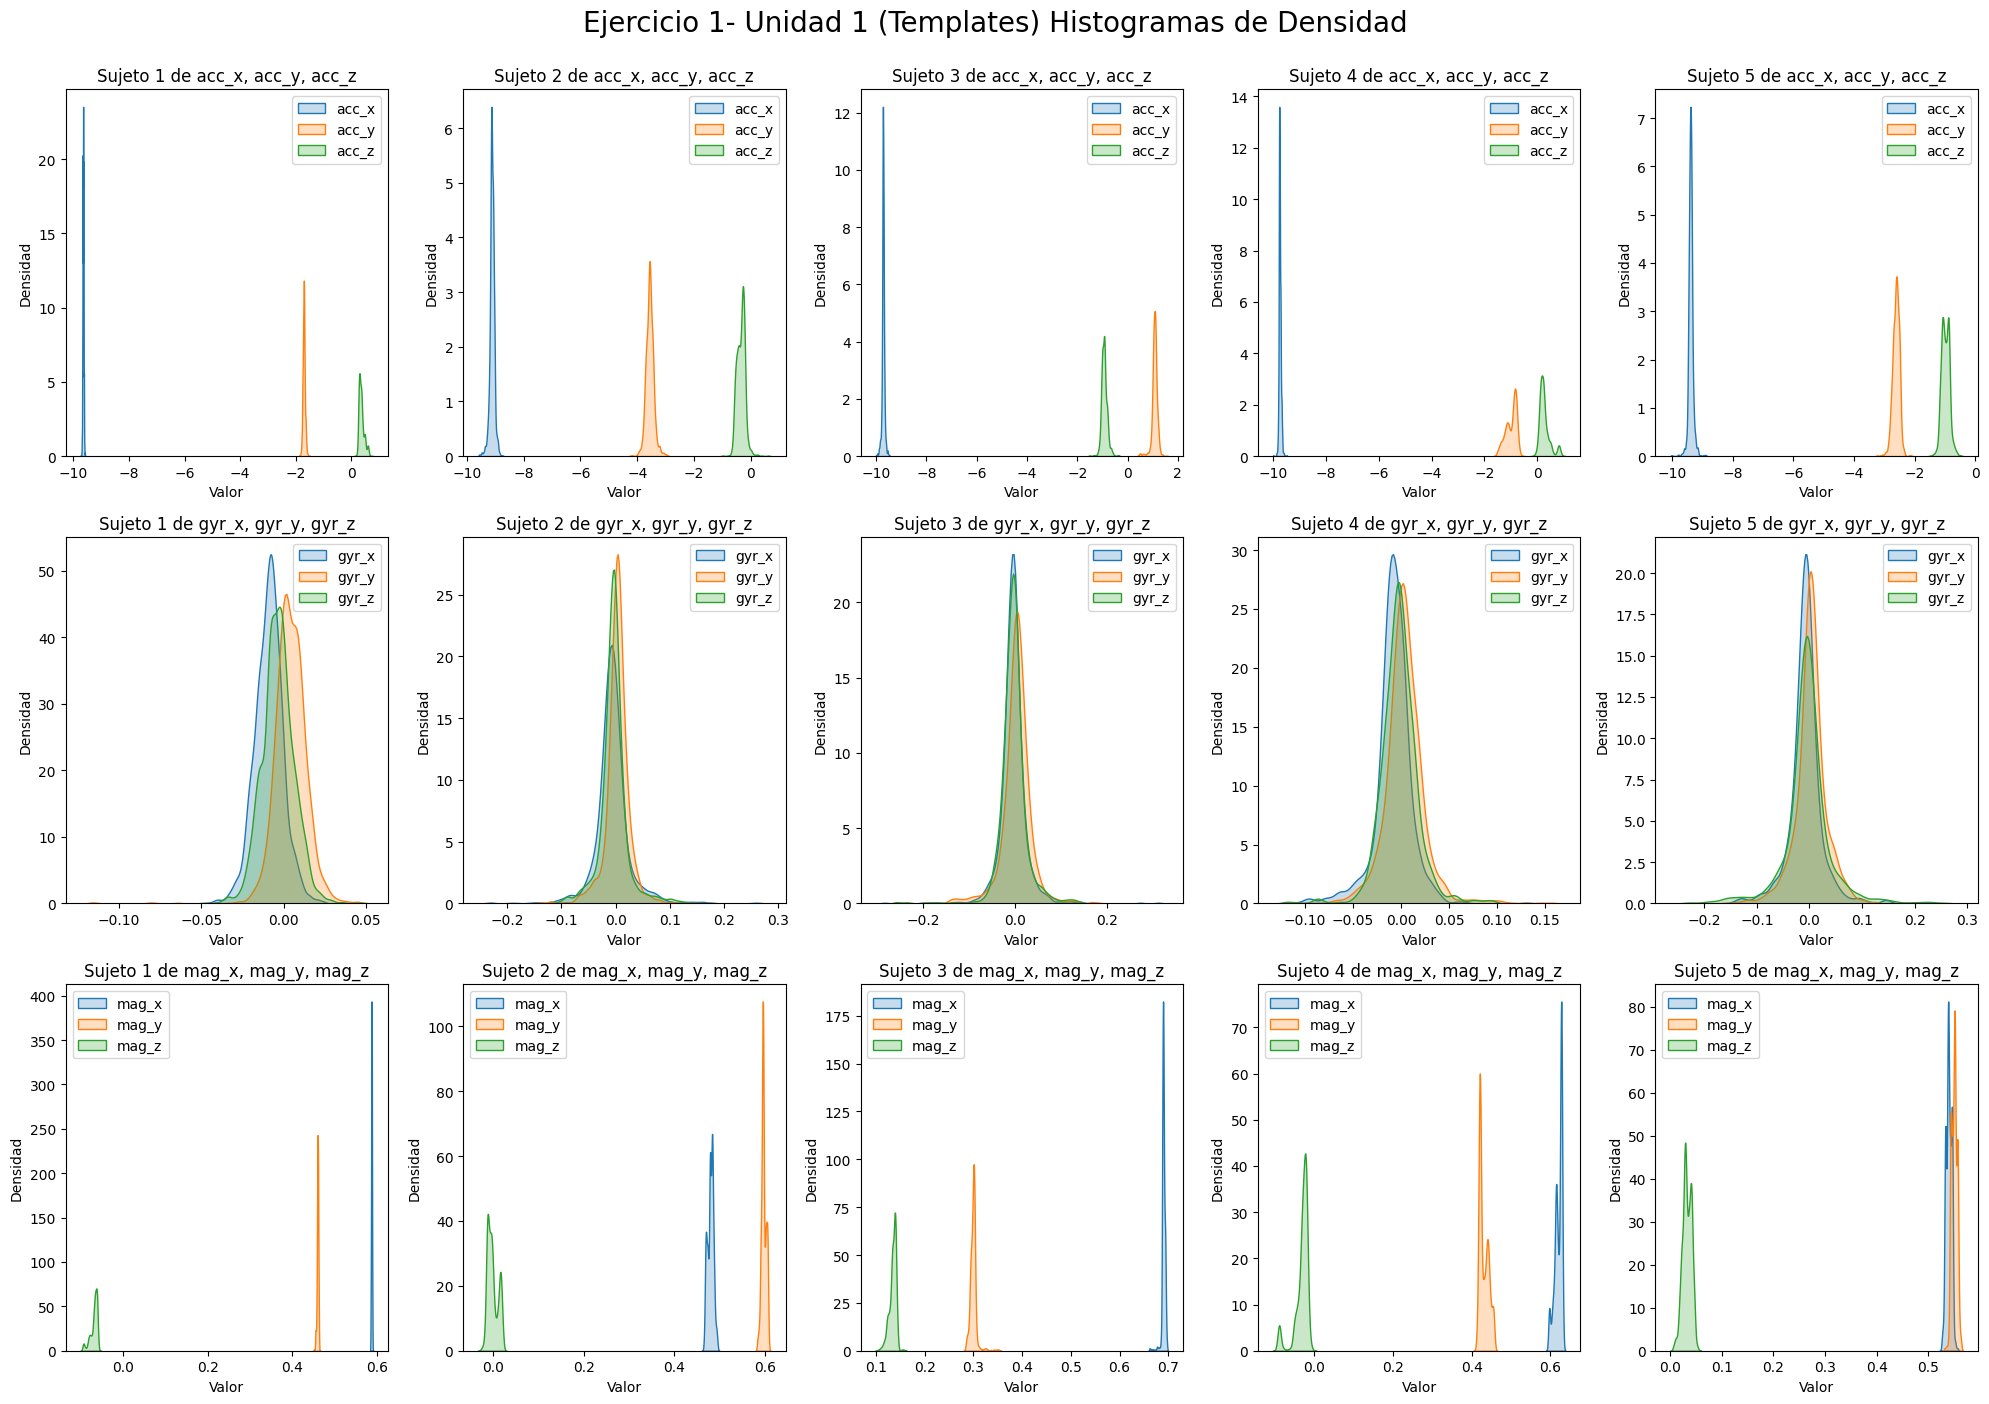

In [18]:
dfu1 = datos_entrenamiento['es1e1u1']
dfu2 = datos_entrenamiento['es2e1u1']
dfu3 = datos_entrenamiento['es3e1u1']
dfu4 = datos_entrenamiento['es4e1u1']
dfu5 = datos_entrenamiento['es5e1u1']


def plot_density(df, ax, title, column_type):
    if column_type == 0:
        # Densidades para acc_x, acc_y, acc_z
        sns.kdeplot(df['acc_x'], label='acc_x', fill=True, ax=ax)
        sns.kdeplot(df['acc_y'], label='acc_y', fill=True, ax=ax)
        sns.kdeplot(df['acc_z'], label='acc_z', fill=True, ax=ax)
        ax.set_title(f'{title} de acc_x, acc_y, acc_z')
    elif column_type == 1:
        # Densidades para gyr_x, gyr_y, gyr_z
        sns.kdeplot(df['gyr_x'], label='gyr_x', fill=True, ax=ax)
        sns.kdeplot(df['gyr_y'], label='gyr_y', fill=True, ax=ax)
        sns.kdeplot(df['gyr_z'], label='gyr_z', fill=True, ax=ax)
        ax.set_title(f'{title} de gyr_x, gyr_y, gyr_z')
    elif column_type == 2:
        # Densidades para mag_x, mag_y, mag_z
        sns.kdeplot(df['mag_x'], label='mag_x', fill=True, ax=ax)
        sns.kdeplot(df['mag_y'], label='mag_y', fill=True, ax=ax)
        sns.kdeplot(df['mag_z'], label='mag_z', fill=True, ax=ax)
        ax.set_title(f'{title} de mag_x, mag_y, mag_z')

    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidad')
    ax.legend()
  

fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

for i, (df, title) in enumerate(zip(data_frames, titles)):
    
    plot_density(df, axes[0, i], title, 0)  # Fila 1: acc
    plot_density(df, axes[1, i], title, 1)  # Fila 2: gyr
    plot_density(df, axes[2, i], title, 2)  # Fila 3: mag

plt.suptitle('Ejercicio 1- Unidad 1 (Templates) Histogramas de Densidad', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()


En este análisis, se observaron las distribuciones de las mediciones de los sensores para el Ejercicio 1 en la Unidad 1, comparando entre sujetos. Las mediciones del acelerómetro (`acc_x`, `acc_y`, `acc_z`) mostraron una variabilidad notable, mientras que los sujetos 4 y 5 presentaron distribuciones más concentradas, sugiriendo mayor consistencia en su ejecución. Las mediciones del giroscopio (`gyr_x`, `gyr_y`, `gyr_z`) fueron más homogéneas entre los participantes, reflejando patrones rotacionales similares en el movimiento. En contraste, el magnetómetro (`mag_x`, `mag_y`, `mag_z`) mostró una alta sensibilidad a las diferencias individuales, probablemente asociadas con la orientación del sensor o la técnica del ejercicio. Estos hallazgos subrayan la importancia de ajustar y calibrar los sensores para mejorar la uniformidad de las mediciones y permiten identificar sujetos con ejecuciones más precisas o variables, información valiosa para evaluar el progreso en fisioterapia.

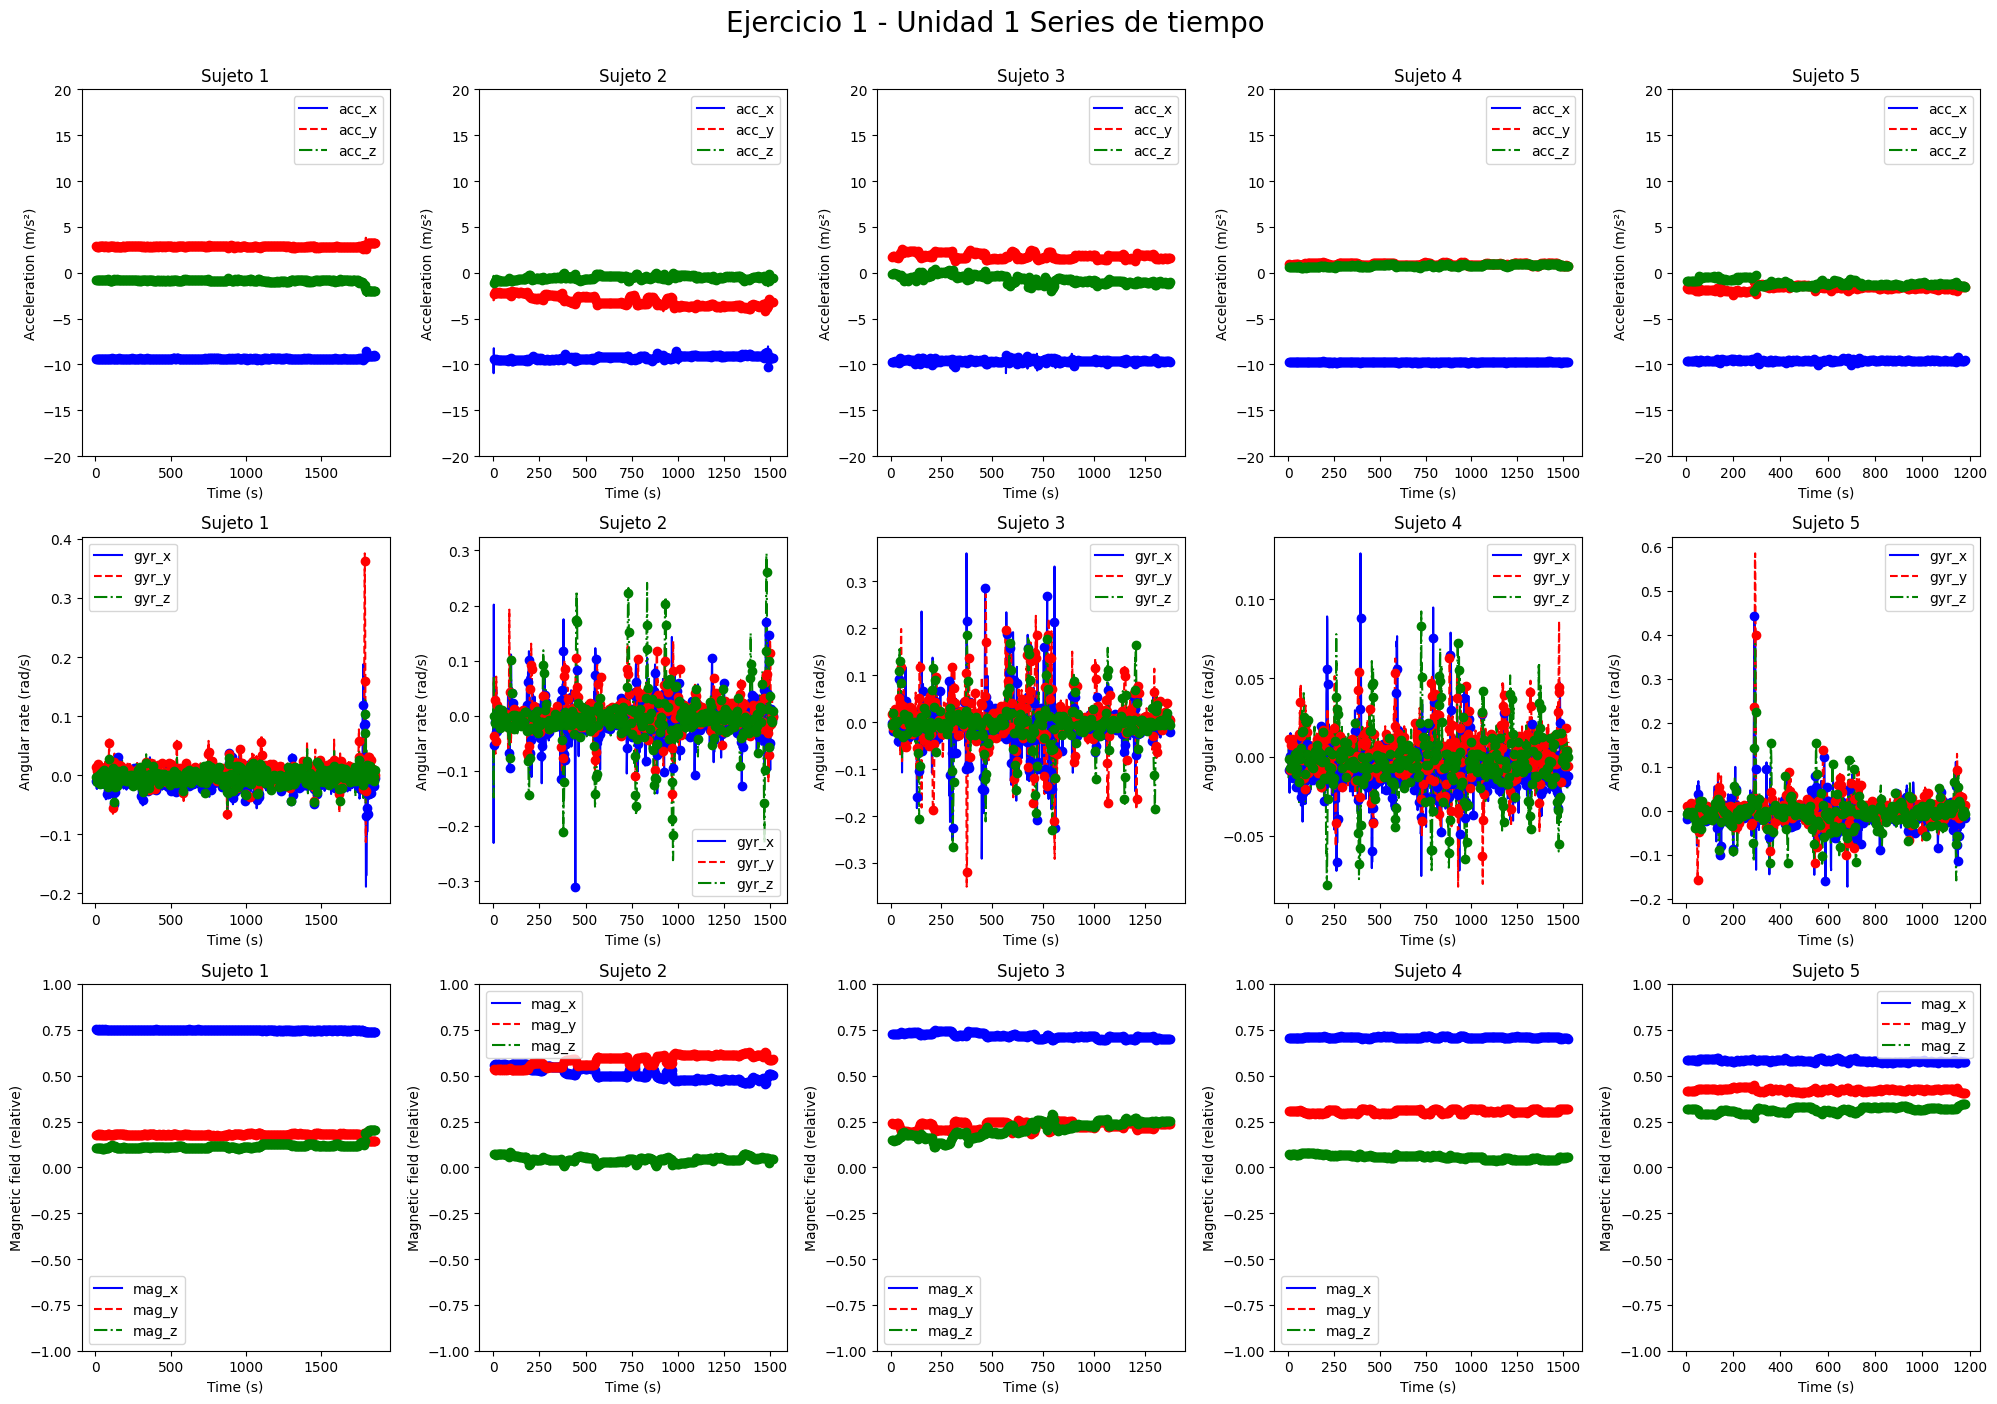

In [22]:
def plot_acceleration(df, ax, title, column_type):
    """Función para trazar las densidades de acc, gyr y mag según el tipo de columna."""
    if column_type == 0:
        # Densidades para acc_x, acc_y, acc_z
        ax.plot(df['time index'], df['acc_x'], 'b-', label='acc_x')  # Línea azul continua para acc_x
        ax.plot(df['time index'], df['acc_y'], 'r--', label='acc_y') # Línea roja discontinua para acc_y
        ax.plot(df['time index'], df['acc_z'], 'g-.', label='acc_z') # Línea verde punteada y discontinua para acc_z

        # Añadir marcadores en puntos específicos (por ejemplo, cada 5 segundos)
        marker_indices = df['time index'] % 5 == 0  # Selecciona cada 5 segundos
        ax.plot(df['time index'][marker_indices], df['acc_x'][marker_indices], 'bo')  # Marcador azul para acc_x
        ax.plot(df['time index'][marker_indices], df['acc_y'][marker_indices], 'ro')  # Marcador rojo para acc_y
        ax.plot(df['time index'][marker_indices], df['acc_z'][marker_indices], 'go')

        ax.set_title(f'{title}')
        ax.set_ylabel('Acceleration (m/s²)')
        ax.set_ylim(-20, 20)
    elif column_type == 1:
        # Densidades para gyr_x, gyr_y, gyr_z
        ax.plot(df['time index'], df['gyr_x'], 'b-', label='gyr_x')  # Línea azul continua para acc_x
        ax.plot(df['time index'], df['gyr_y'], 'r--', label='gyr_y') # Línea roja discontinua para acc_y
        ax.plot(df['time index'], df['gyr_z'], 'g-.', label='gyr_z') # Línea verde punteada y discontinua para acc_z

        # Añadir marcadores en puntos específicos (por ejemplo, cada 5 segundos)
        marker_indices = df['time index'] % 5 == 0  # Selecciona cada 5 segundos
        ax.plot(df['time index'][marker_indices], df['gyr_x'][marker_indices], 'bo')  # Marcador azul para acc_x
        ax.plot(df['time index'][marker_indices], df['gyr_y'][marker_indices], 'ro')  # Marcador rojo para acc_y
        ax.plot(df['time index'][marker_indices], df['gyr_z'][marker_indices], 'go')
        ax.set_title(f'{title}')
        ax.set_ylabel('Angular rate (rad/s)')
        

    elif column_type == 2:
        # Densidades para mag_x, mag_y, mag_z
        ax.plot(df['time index'], df['mag_x'], 'b-', label='mag_x')  # Línea azul continua para acc_x
        ax.plot(df['time index'], df['mag_y'], 'r--', label='mag_y') # Línea roja discontinua para acc_y
        ax.plot(df['time index'], df['mag_z'], 'g-.', label='mag_z') # Línea verde punteada y discontinua para acc_z

        # Añadir marcadores en puntos específicos (por ejemplo, cada 5 segundos)
        marker_indices = df['time index'] % 5 == 0  # Selecciona cada 5 segundos
        ax.plot(df['time index'][marker_indices], df['mag_x'][marker_indices], 'bo')  # Marcador azul para acc_x
        ax.plot(df['time index'][marker_indices], df['mag_y'][marker_indices], 'ro')  # Marcador rojo para acc_y
        ax.plot(df['time index'][marker_indices], df['mag_z'][marker_indices], 'go')
        ax.set_title(f'{title}')
        ax.set_ylabel('Magnetic field (relative)')
        ax.set_ylim(-1, 1)

    ax.set_xlabel('Time (s)')
    ax.legend()

# Crear el gráfico con subgráficos
fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

# Iterar sobre las unidades y los subgráficos
for i, (df, title) in enumerate(zip(data_frames, titles)):
    plot_acceleration(df, axes[0, i], title, 0) 
    plot_acceleration(df, axes[1, i], title, 1)  
    plot_acceleration(df, axes[2, i], title, 2)  

plt.suptitle('Ejercicio 1 - Unidad 1 Series de tiempo', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()

El acelerómetro mostró patrones estables y repetitivos en general, aunque el Sujeto 5 presentó mayor variabilidad en `acc_z`, posiblemente relacionada con menor estabilidad en la ejecución, mientras que el Sujeto 1 mostró un control más consistente. El giroscopio, más sensible a las diferencias individuales, reveló que los Sujetos 3 y 4 tuvieron picos pronunciados, lo que indica movimientos más amplios o menos controlados, mientras que el Sujeto 2 mostró mayor estabilidad. El magnetómetro reflejó mayor variabilidad en los Sujetos 2 y 3, posiblemente debido a fluctuaciones en la orientación o postura, en contraste con los Sujetos 1 y 5, cuyos patrones fueron más planos y uniformes.

### Ejercicio 2 - Distribución de los datos y Visualización de series de tiempo

Ahora estos gráficos muestran las distribuciones de los datos provenientes de los sensores (acelerómetro, giroscopio y magnetómetro) para el Ejercicio 2 realizado por los 5 sujetos con la Unidad 1.

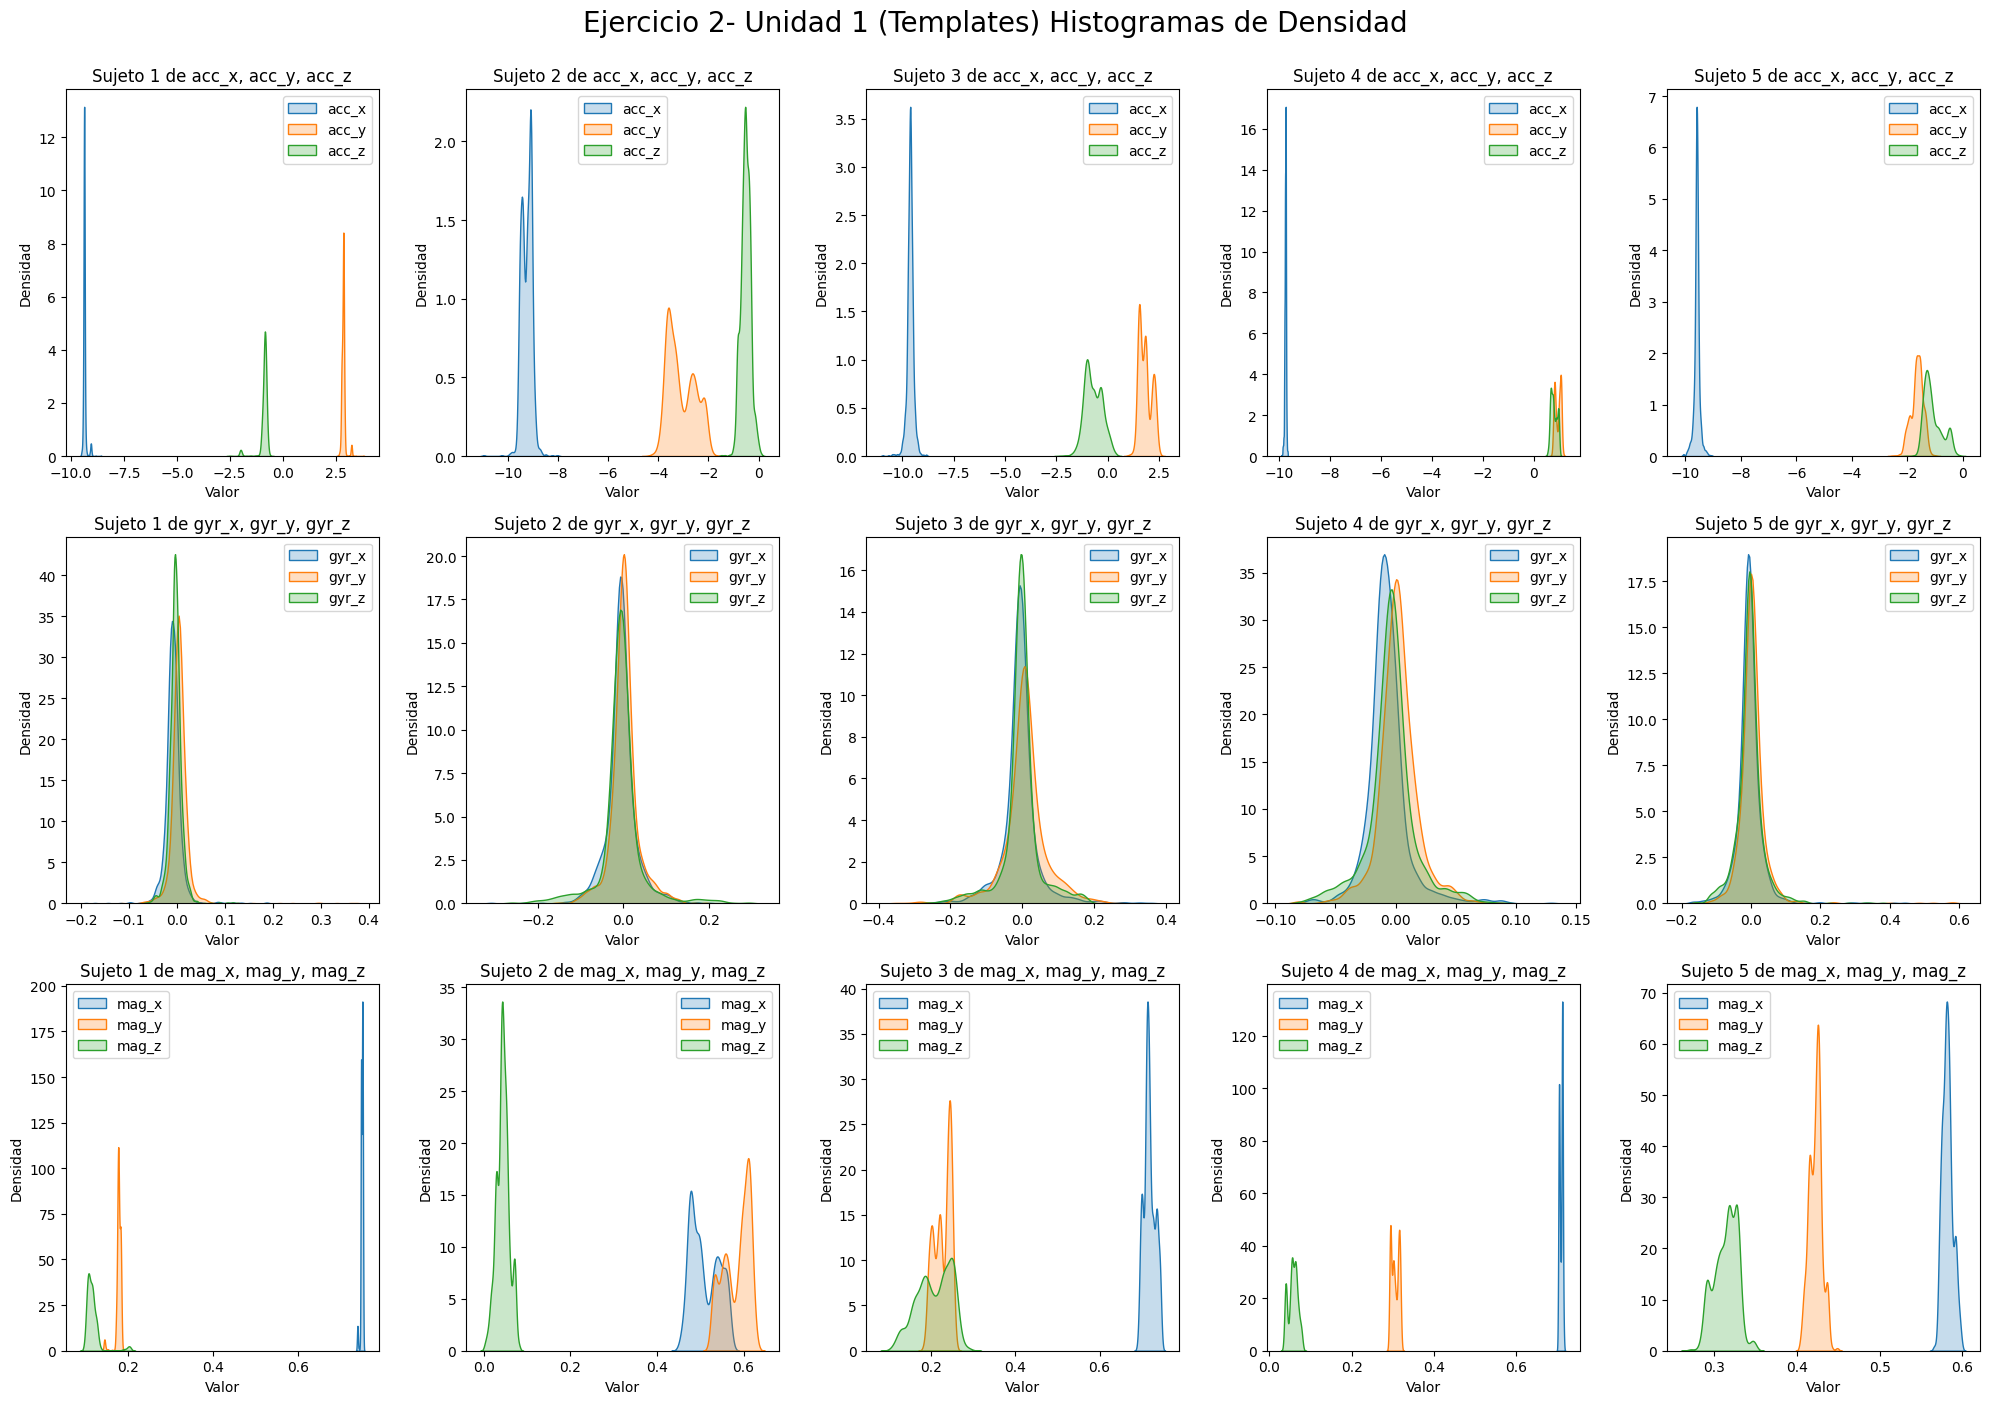

In [21]:
dfu1 = datos_entrenamiento['es1e2u1']
dfu2 = datos_entrenamiento['es2e2u1']
dfu3 = datos_entrenamiento['es3e2u1']
dfu4 = datos_entrenamiento['es4e2u1']
dfu5 = datos_entrenamiento['es5e2u1']


fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

for i, (df, title) in enumerate(zip(data_frames, titles)):
    
    plot_density(df, axes[0, i], title, 0)  # Fila 1: acc
    plot_density(df, axes[1, i], title, 1)  # Fila 2: gyr
    plot_density(df, axes[2, i], title, 2)  # Fila 3: mag

plt.suptitle('Ejercicio 2- Unidad 1 (Templates) Histogramas de Densidad', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()


Se observaron patrones generales consistentes en las mediciones del acelerómetro y el giroscopio entre los cinco sujetos, lo que sugiere que el ejercicio implica movimientos repetitivos y controlados. Sin embargo, se identificaron diferencias individuales, como en el Sujeto 2, que mostró mayor dispersión en `acc_y` y en los ejes del magnetómetro, reflejando variabilidad en la técnica o posibles desviaciones posturales. El Sujeto 5 presentó mayor amplitud en `acc_z` y `mag_z`, lo que podría estar asociado con movimientos más amplios en el eje vertical o fluctuaciones en el campo magnético. Por otro lado, el giroscopio evidenció patrones rotacionales similares entre sujetos, indicando movimientos controlados en este aspecto.

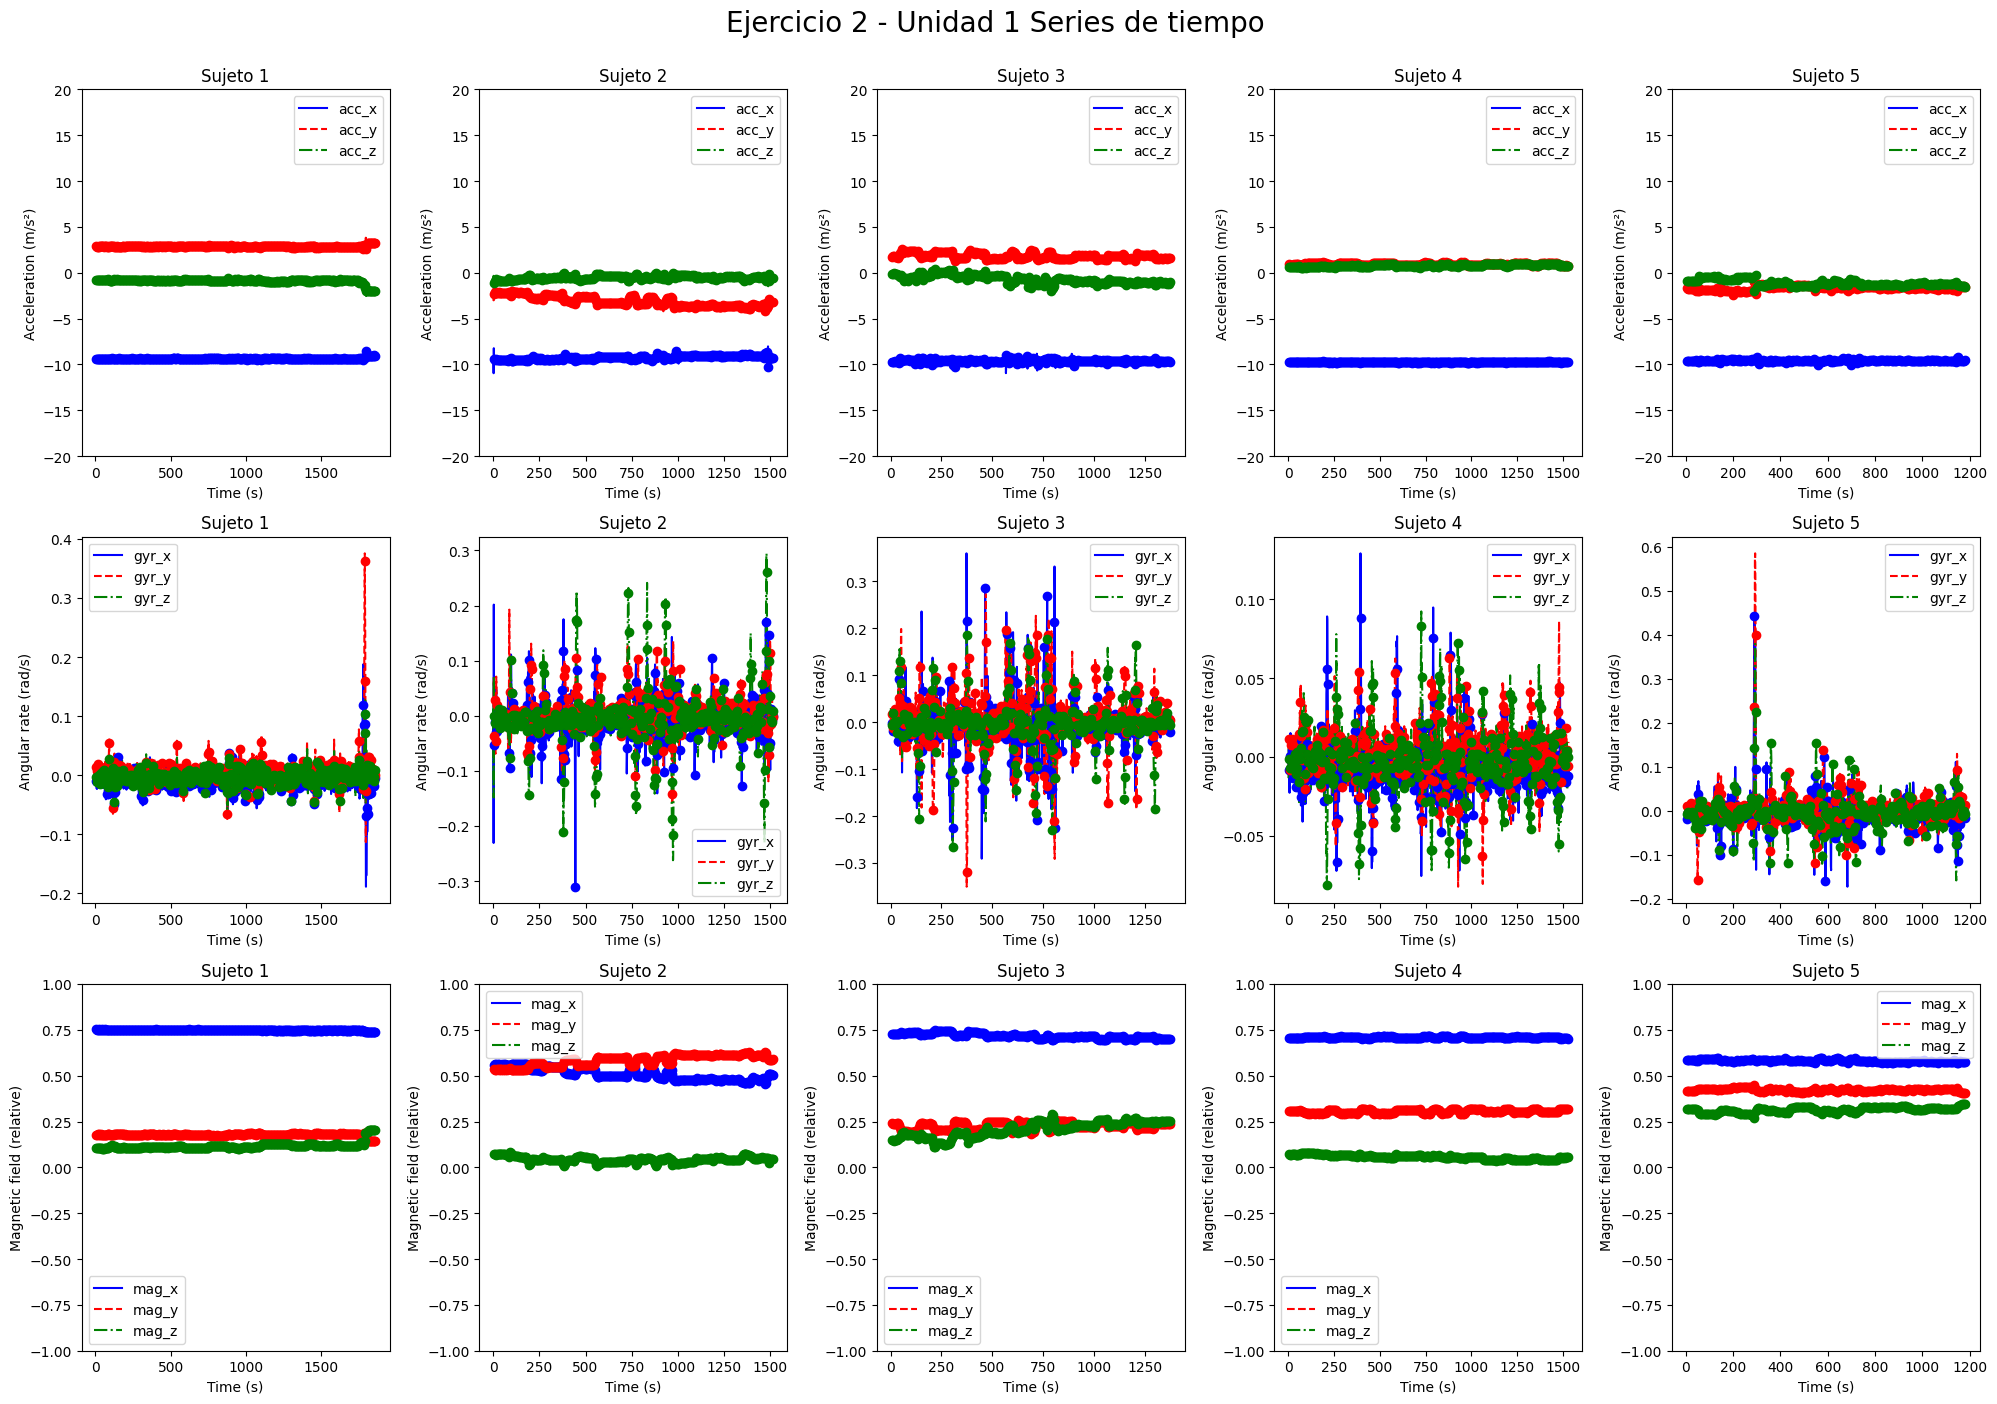

In [23]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

# Iterar sobre las unidades y los subgráficos
for i, (df, title) in enumerate(zip(data_frames, titles)):
    plot_acceleration(df, axes[0, i], title, 0) 
    plot_acceleration(df, axes[1, i], title, 1)  
    plot_acceleration(df, axes[2, i], title, 2)  

plt.suptitle('Ejercicio 2 - Unidad 1 Series de tiempo', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()

El acelerómetro mostró patrones consistentes entre los sujetos, con valores relativamente estables y repetitivos en los ejes `acc_x`, `acc_y` y `acc_z`, aunque el Sujeto 2 presentó mayor variabilidad en `acc_y`, posiblemente reflejando movimientos laterales menos controlados. En el giroscopio, las mediciones evidenciaron mayor sensibilidad a las diferencias individuales, con el Sujeto 4 mostrando mayor dispersión en `gyr_x` y `gyr_z`, lo que sugiere movimientos rotacionales más amplios o inestables. El magnetómetro presentó variaciones notables entre sujetos, especialmente en `mag_y` y `mag_z`, donde el Sujeto 2 mostró fluctuaciones más amplias, lo que podría indicar cambios en la orientación del sensor o inestabilidad postural.

### Ejercicio 3 - Distribución de los datos y Visualización de series de tiempo

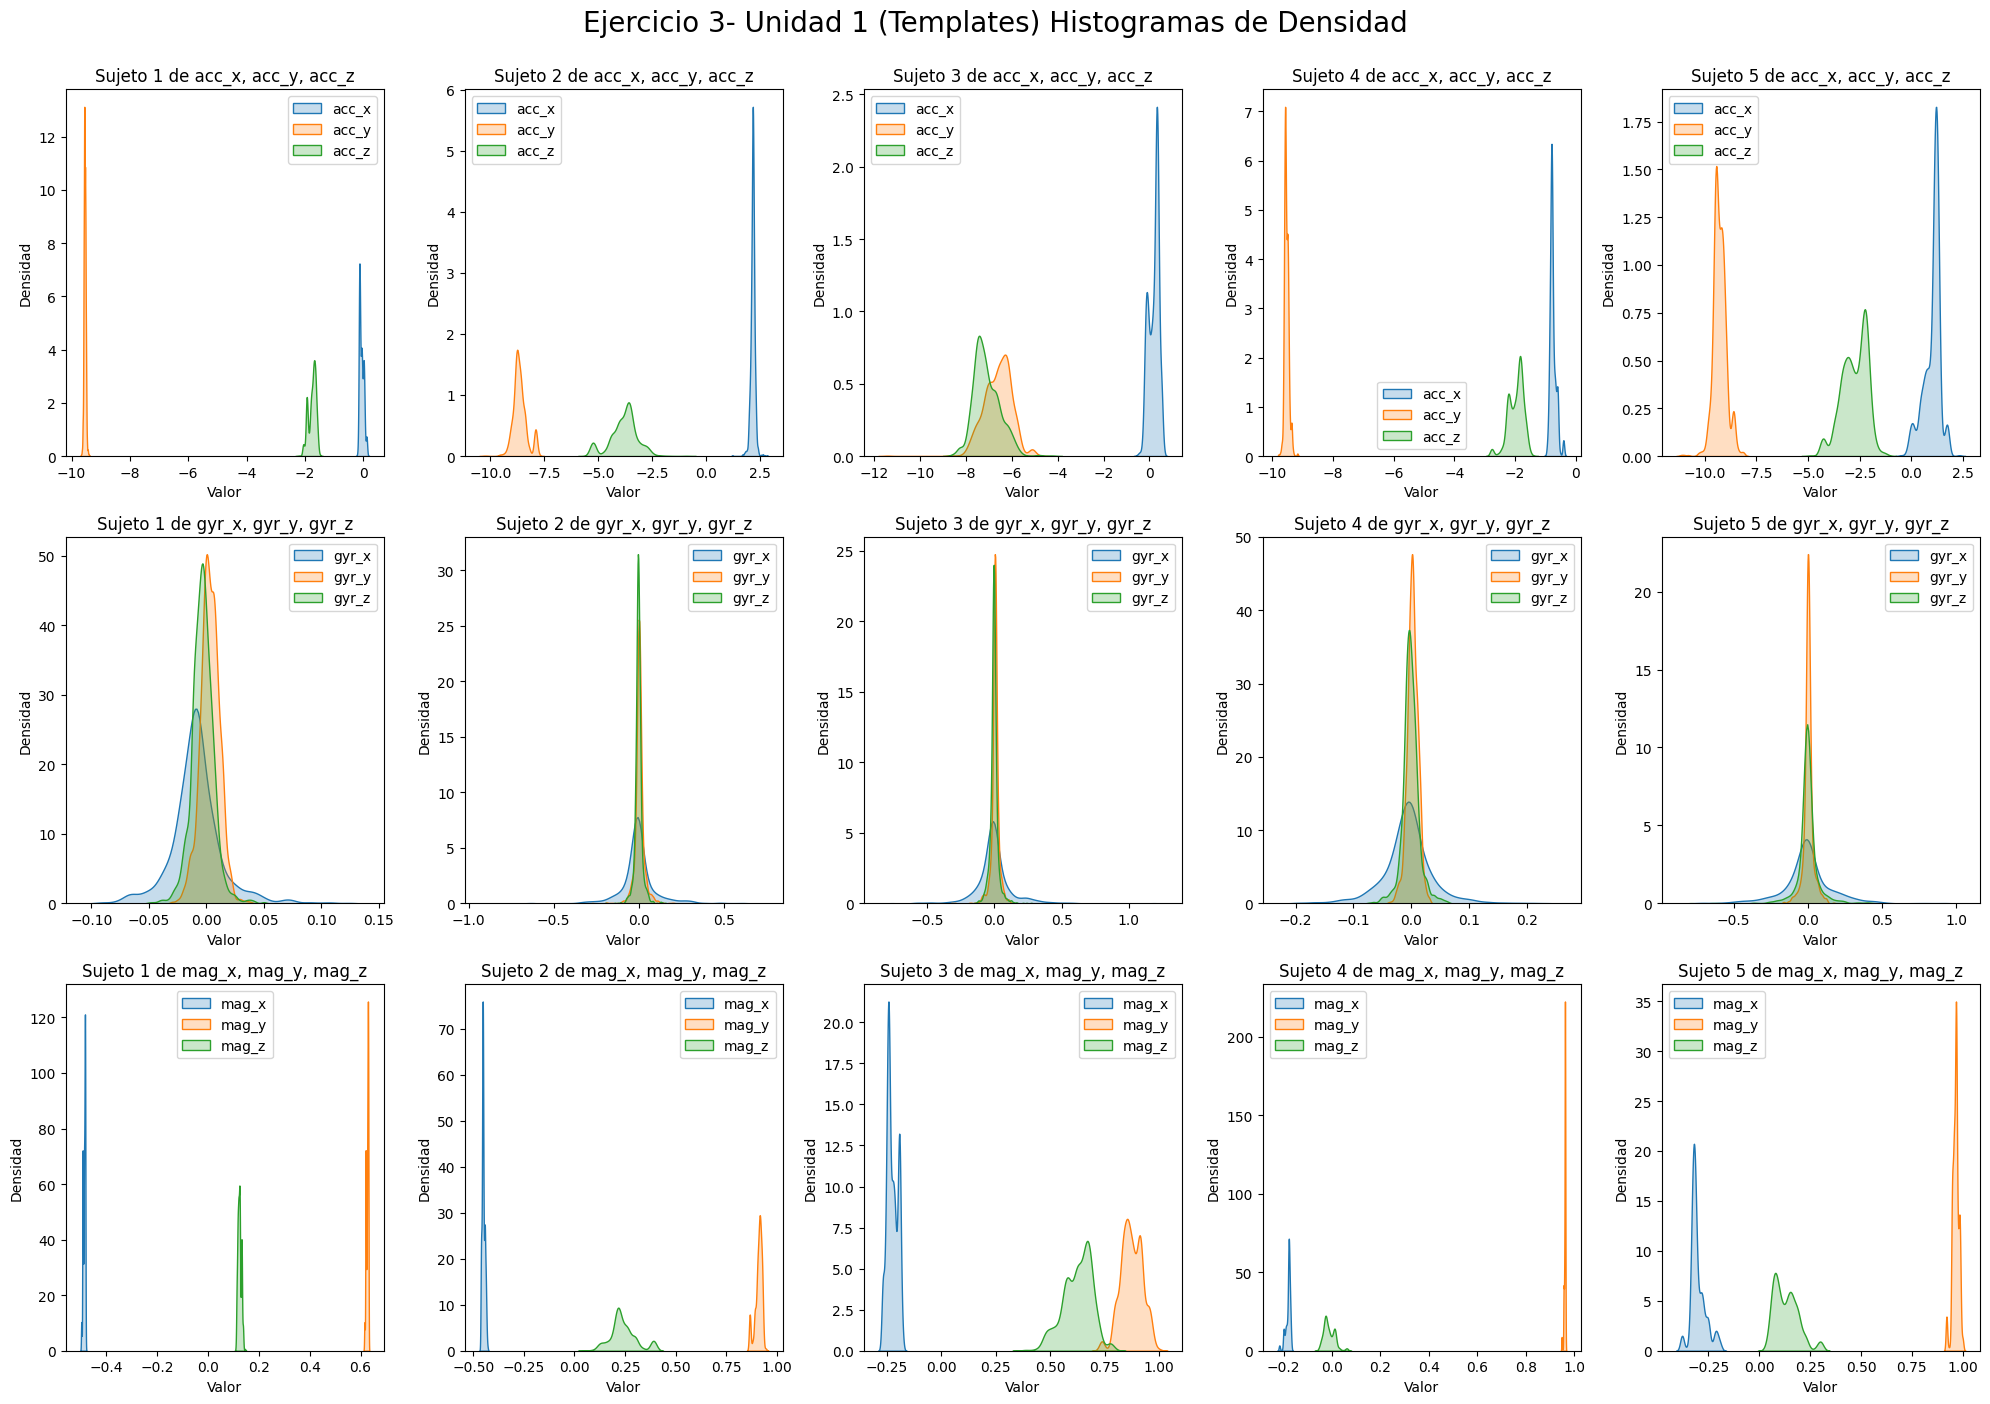

In [ ]:
dfu1 = datos_entrenamiento['es1e3u1']
dfu2 = datos_entrenamiento['es2e3u1']
dfu3 = datos_entrenamiento['es3e3u1']
dfu4 = datos_entrenamiento['es4e3u1']
dfu5 = datos_entrenamiento['es5e3u1']

fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

for i, (df, title) in enumerate(zip(data_frames, titles)):
    
    plot_density(df, axes[0, i], title, 0)  # Fila 1: acc
    plot_density(df, axes[1, i], title, 1)  # Fila 2: gyr
    plot_density(df, axes[2, i], title, 2)  # Fila 3: mag

plt.suptitle('Ejercicio 3- Unidad 1 (Templates) Histogramas de Densidad', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()


En los histogramas de densidad para el Ejercicio 3, se observa que las distribuciones del acelerómetro (acc_x, acc_y, acc_z) son consistentes entre los sujetos en términos de rangos, aunque presentan algunas diferencias en la forma. En particular, el eje acc_y del Sujeto 2 muestra una mayor dispersión, lo que podría indicar un menor control lateral en el movimiento. Asimismo, el Sujeto 5 tiene distribuciones más amplias en acc_z, lo que sugiere mayor variabilidad en el eje vertical. Por su parte, el giroscopio (gyr_x, gyr_y, gyr_z) presenta patrones altamente concentrados en todos los sujetos, lo que indica movimientos rotacionales controlados y consistentes. El magnetómetro, sin embargo, refleja mayor variabilidad, especialmente en mag_x y mag_y, con el Sujeto 2 mostrando picos más amplios y dispersos, posiblemente debido a fluctuaciones en la orientación o técnica.

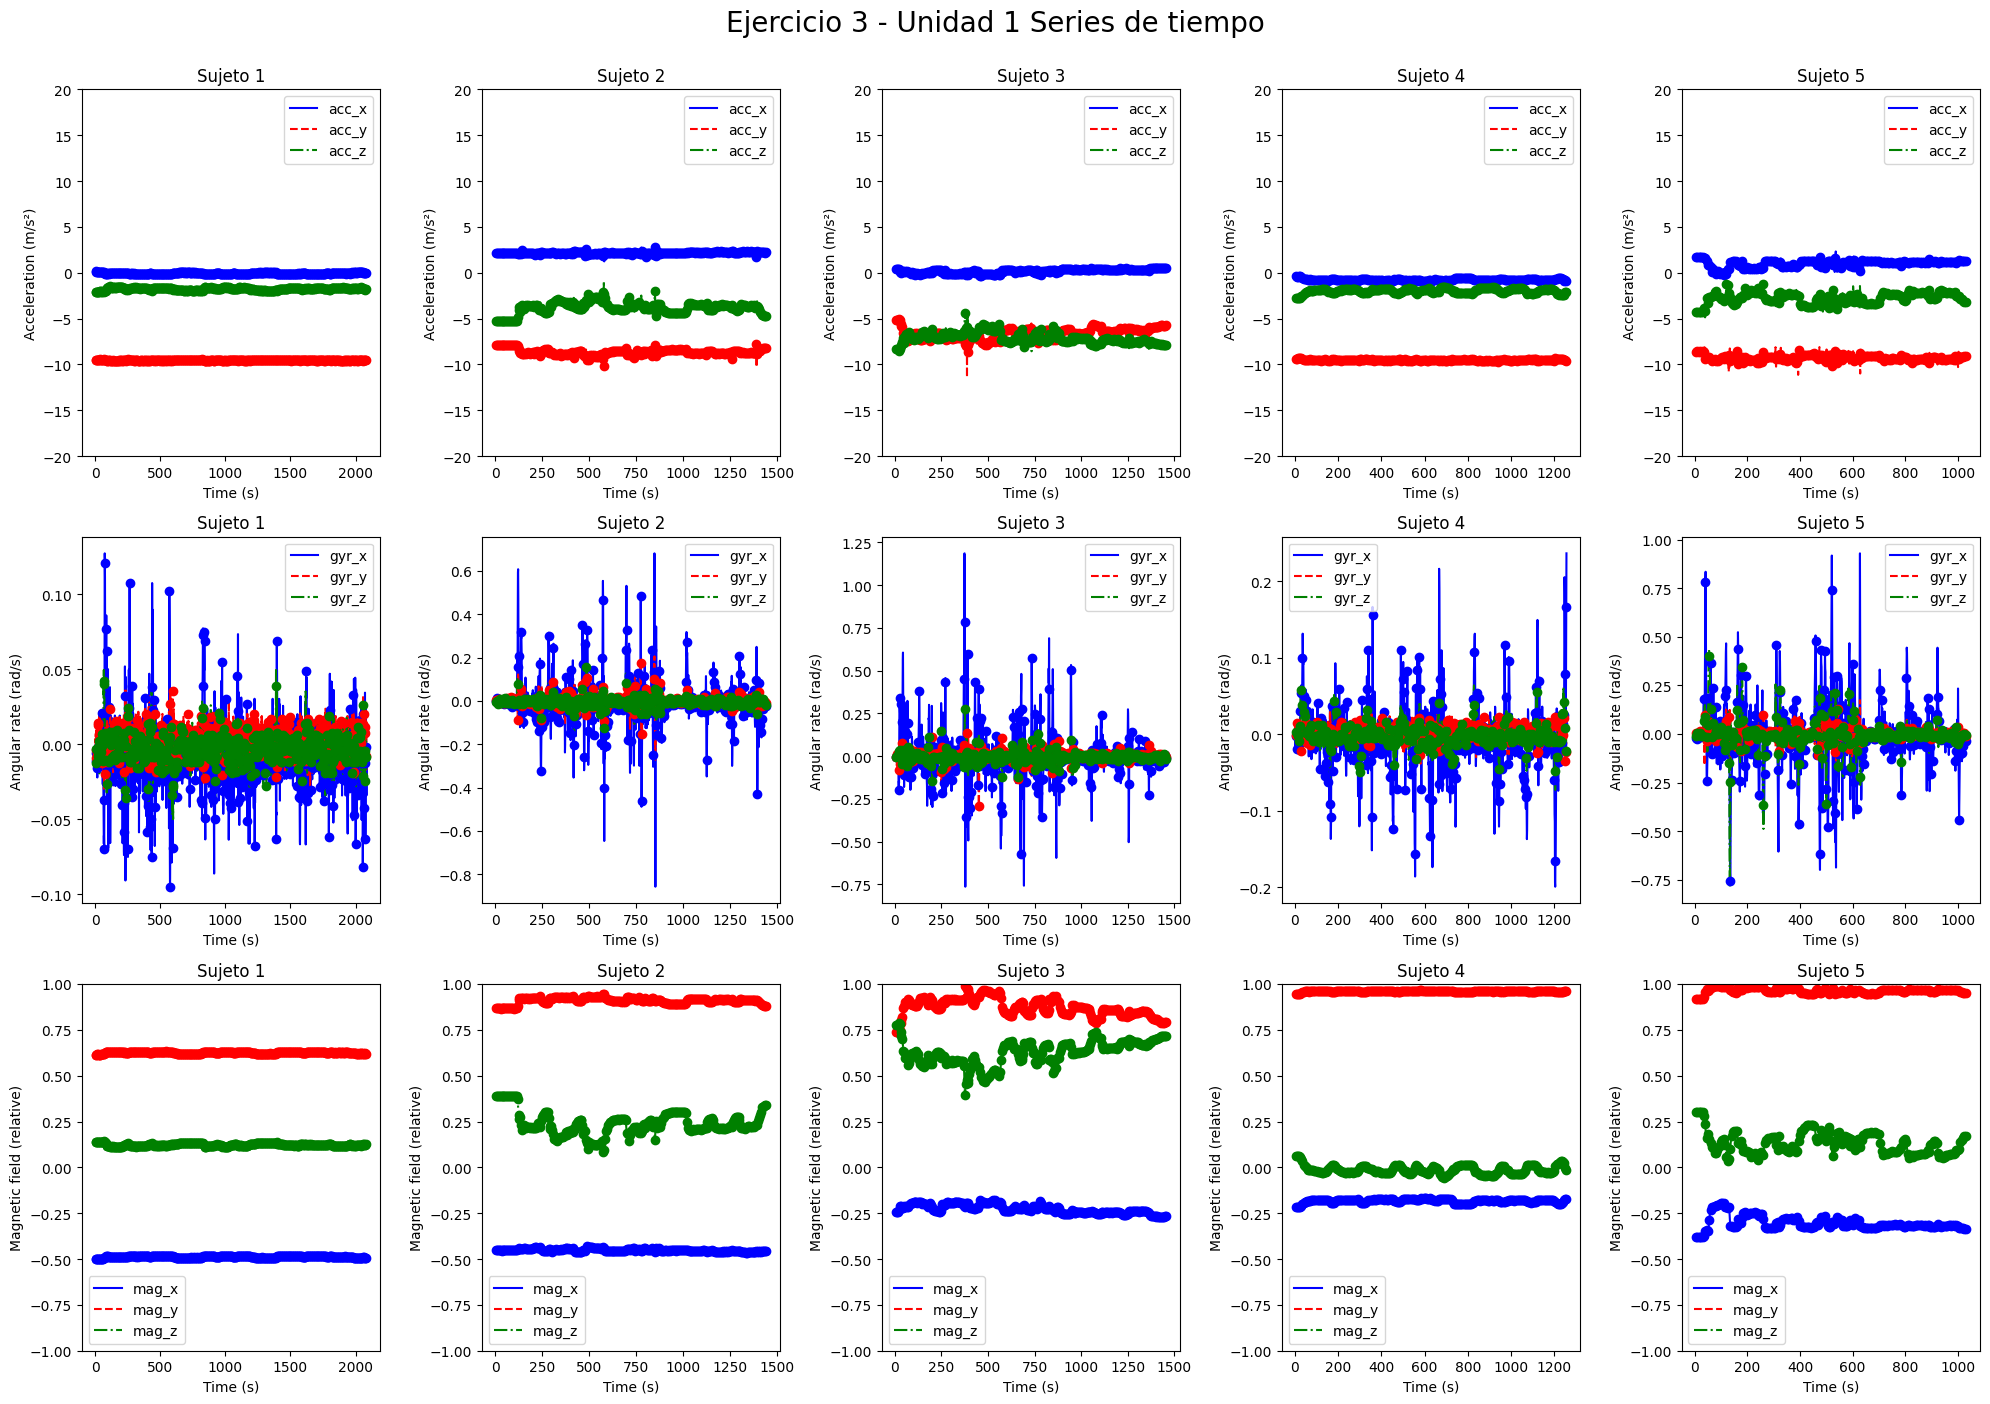

In [25]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

# Iterar sobre las unidades y los subgráficos
for i, (df, title) in enumerate(zip(data_frames, titles)):
    plot_acceleration(df, axes[0, i], title, 0) 
    plot_acceleration(df, axes[1, i], title, 1)  
    plot_acceleration(df, axes[2, i], title, 2)  

plt.suptitle('Ejercicio 3 - Unidad 1 Series de tiempo', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()

En las series de tiempo, el acelerómetro evidencia patrones repetitivos y estables en la mayoría de los sujetos, con ligeras variaciones en la magnitud de los ejes. Los Sujetos 2 y 5 muestran fluctuaciones más marcadas en acc_y y acc_z, respectivamente, lo que podría reflejar inestabilidad o técnica menos precisa. En el caso del giroscopio, las variaciones angulares son más pronunciadas en el Sujeto 4, especialmente en gyr_x y gyr_z, indicando movimientos rotacionales más amplios o menos controlados. Por otro lado, el magnetómetro muestra patrones estables en los Sujetos 1 y 3, mientras que los Sujetos 2 y 5 presentan mayor variabilidad en los tres ejes, lo que podría estar relacionado con cambios en la postura o desajustes en la colocación del sensor.

### Ejercicio 4 - Distribución de los datos y Visualización de series de tiempo

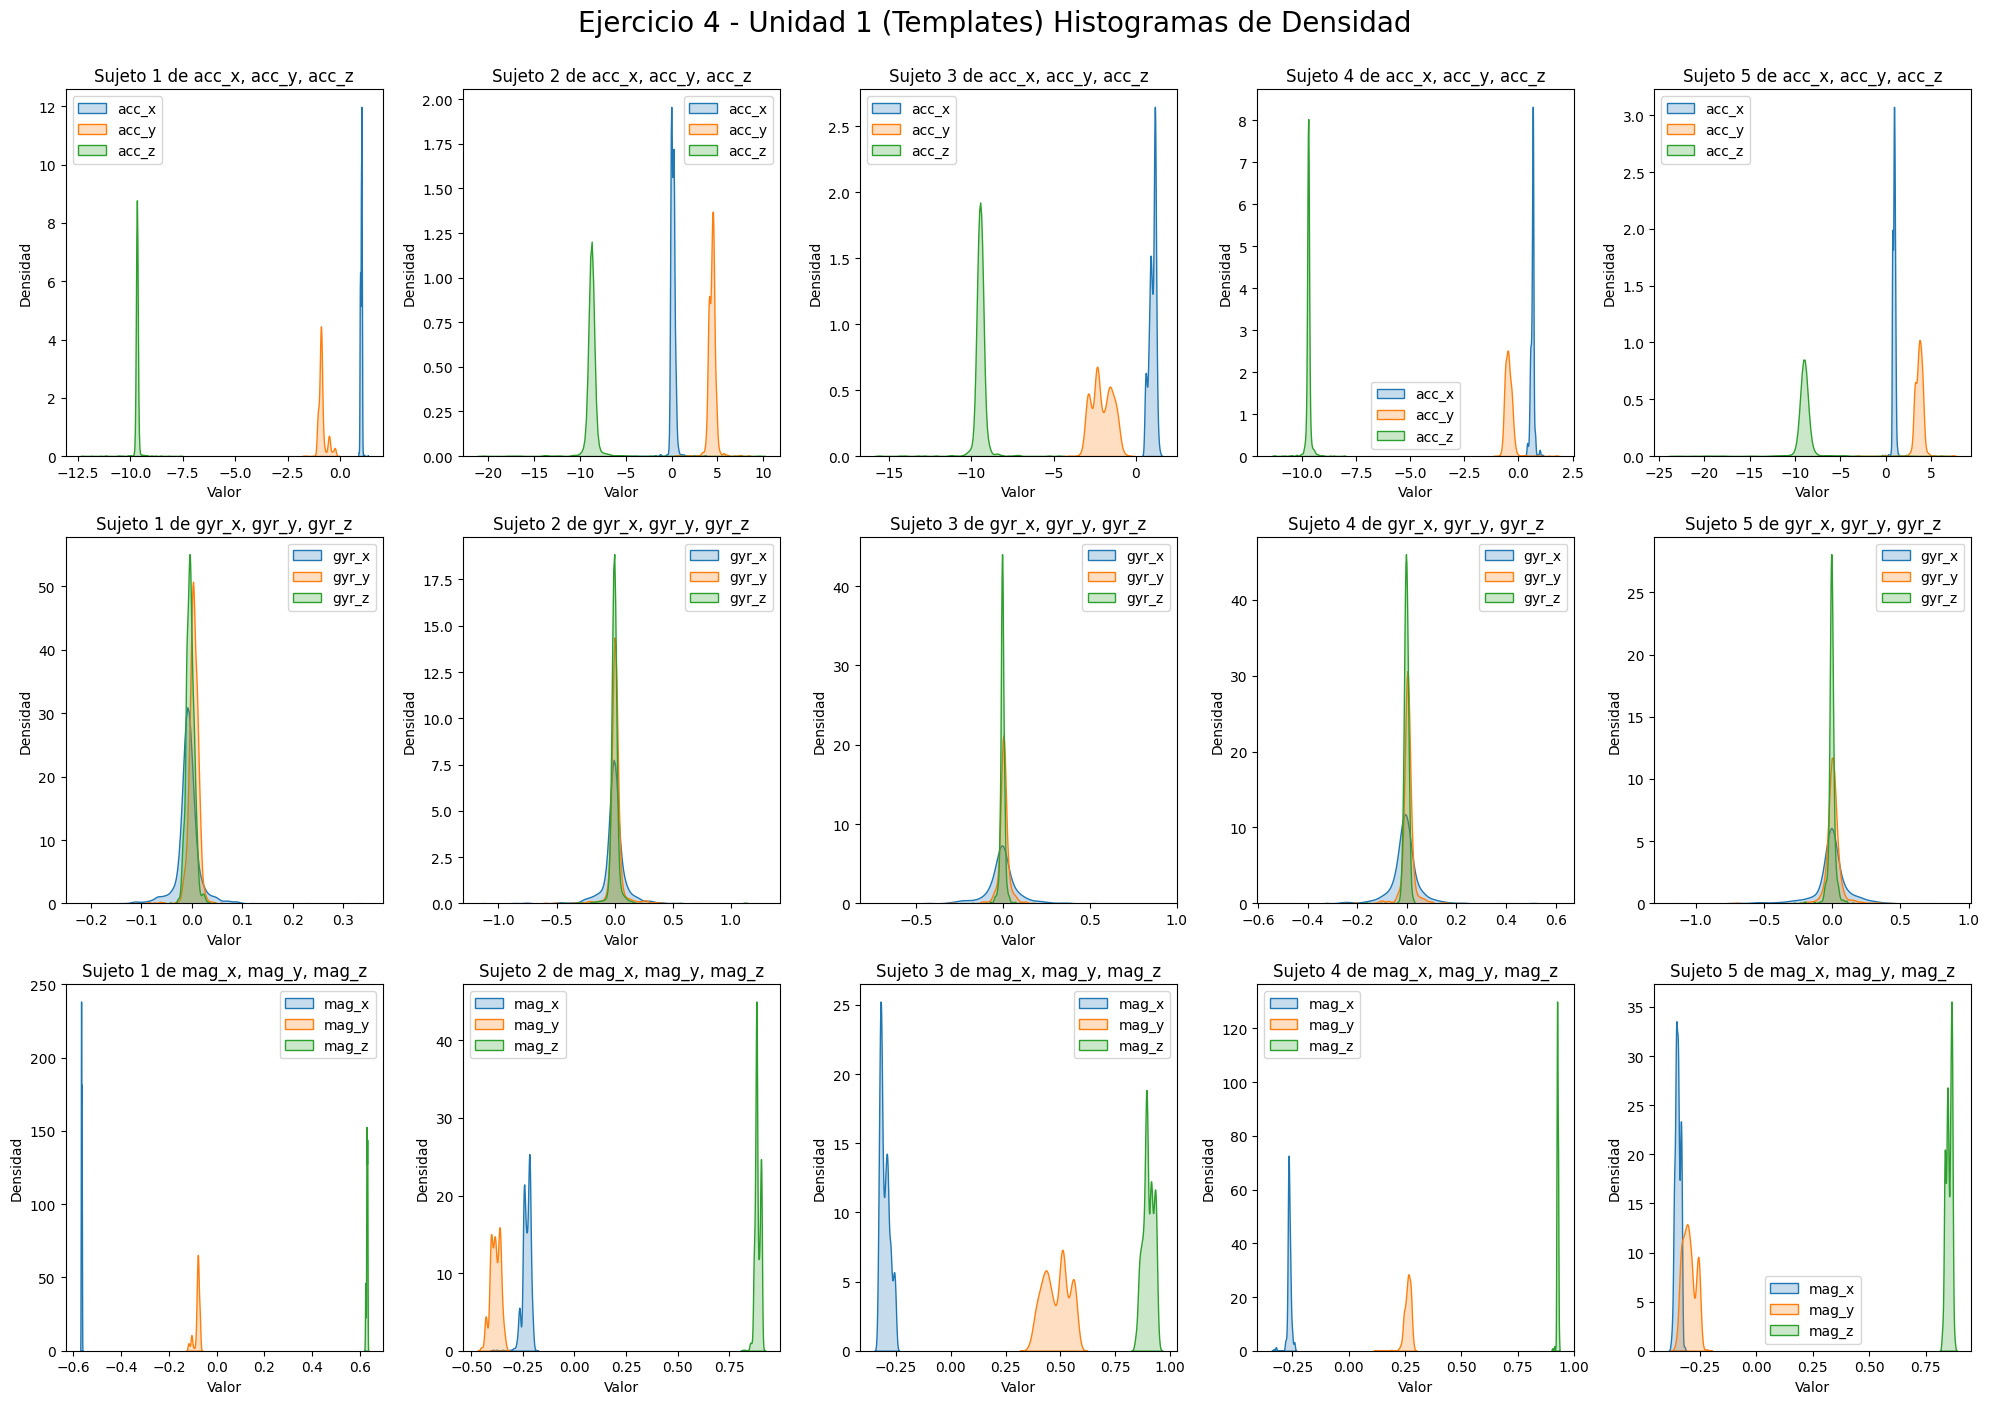

In [26]:
dfu1 = datos_entrenamiento['es1e4u1']
dfu2 = datos_entrenamiento['es2e4u1']
dfu3 = datos_entrenamiento['es3e4u1']
dfu4 = datos_entrenamiento['es4e4u1']
dfu5 = datos_entrenamiento['es5e4u1']


fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

for i, (df, title) in enumerate(zip(data_frames, titles)):
    
    plot_density(df, axes[0, i], title, 0)  # Fila 1: acc
    plot_density(df, axes[1, i], title, 1)  # Fila 2: gyr
    plot_density(df, axes[2, i], title, 2)  # Fila 3: mag

plt.suptitle('Ejercicio 4 - Unidad 1 (Templates) Histogramas de Densidad', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()


Revelan patrones consistentes en el acelerómetro (acc_x, acc_y, acc_z) entre los sujetos, con picos bien definidos y rangos similares. Sin embargo, el Sujeto 2 muestra una mayor dispersión en acc_y, lo que podría indicar movimientos laterales menos controlados, mientras que el Sujeto 5 tiene una variabilidad notable en acc_z, sugiriendo fluctuaciones en el eje vertical. Las mediciones del giroscopio (gyr_x, gyr_y, gyr_z) presentan distribuciones estrechas y consistentes en todos los sujetos, reflejando movimientos rotacionales controlados. Por otro lado, el magnetómetro muestra mayor variabilidad, con diferencias significativas entre sujetos en mag_x y mag_y, particularmente en el Sujeto 2, que presenta distribuciones más amplias, lo que podría estar relacionado con fluctuaciones posturales o desajustes en la orientación del sensor.

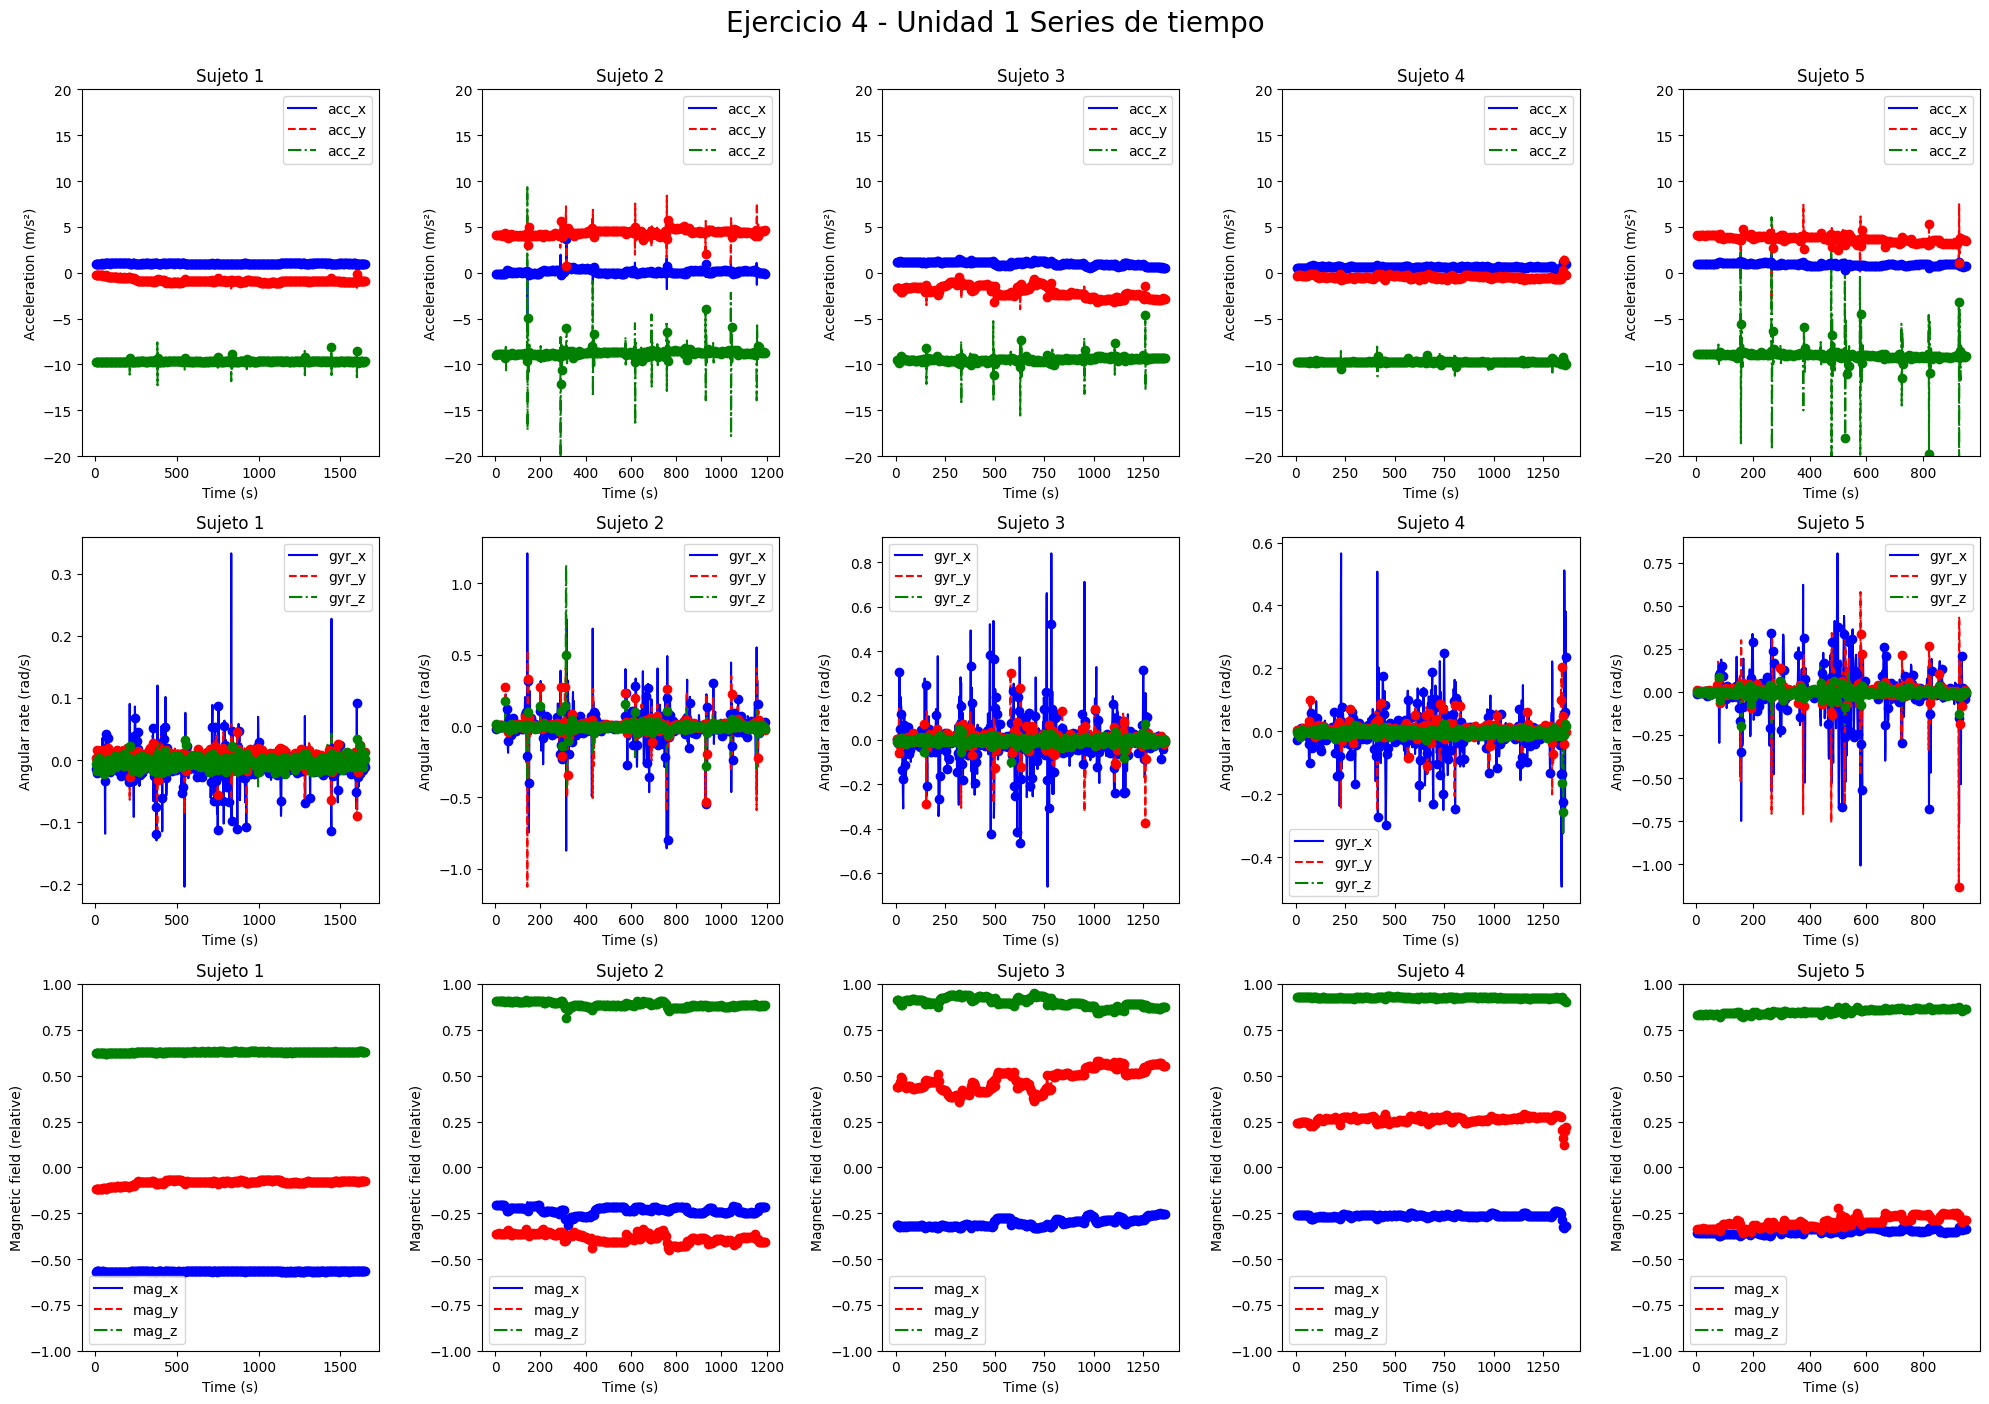

In [27]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

# Iterar sobre las unidades y los subgráficos
for i, (df, title) in enumerate(zip(data_frames, titles)):
    plot_acceleration(df, axes[0, i], title, 0) 
    plot_acceleration(df, axes[1, i], title, 1)  
    plot_acceleration(df, axes[2, i], title, 2)  

plt.suptitle('Ejercicio 4 - Unidad 1 Series de tiempo', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()

En las series de tiempo, el acelerómetro muestra patrones repetitivos y estables en la mayoría de los sujetos. Sin embargo, el Sujeto 5 presenta mayores oscilaciones en acc_y y acc_z, lo que podría reflejar variabilidad en la técnica o menor control del movimiento. Las mediciones del giroscopio son más sensibles a las diferencias individuales, con el Sujeto 4 mostrando picos más pronunciados en gyr_z, lo que sugiere rotaciones menos controladas. Por su parte, el magnetómetro evidencia patrones estables en el Sujeto 1, mientras que los Sujetos 2 y 5 muestran mayor dispersión, lo que podría reflejar cambios posturales o una colocación subóptima del sensor.

### Ejercicio 5 - Distribución de los datos y Visualización de series de tiempo

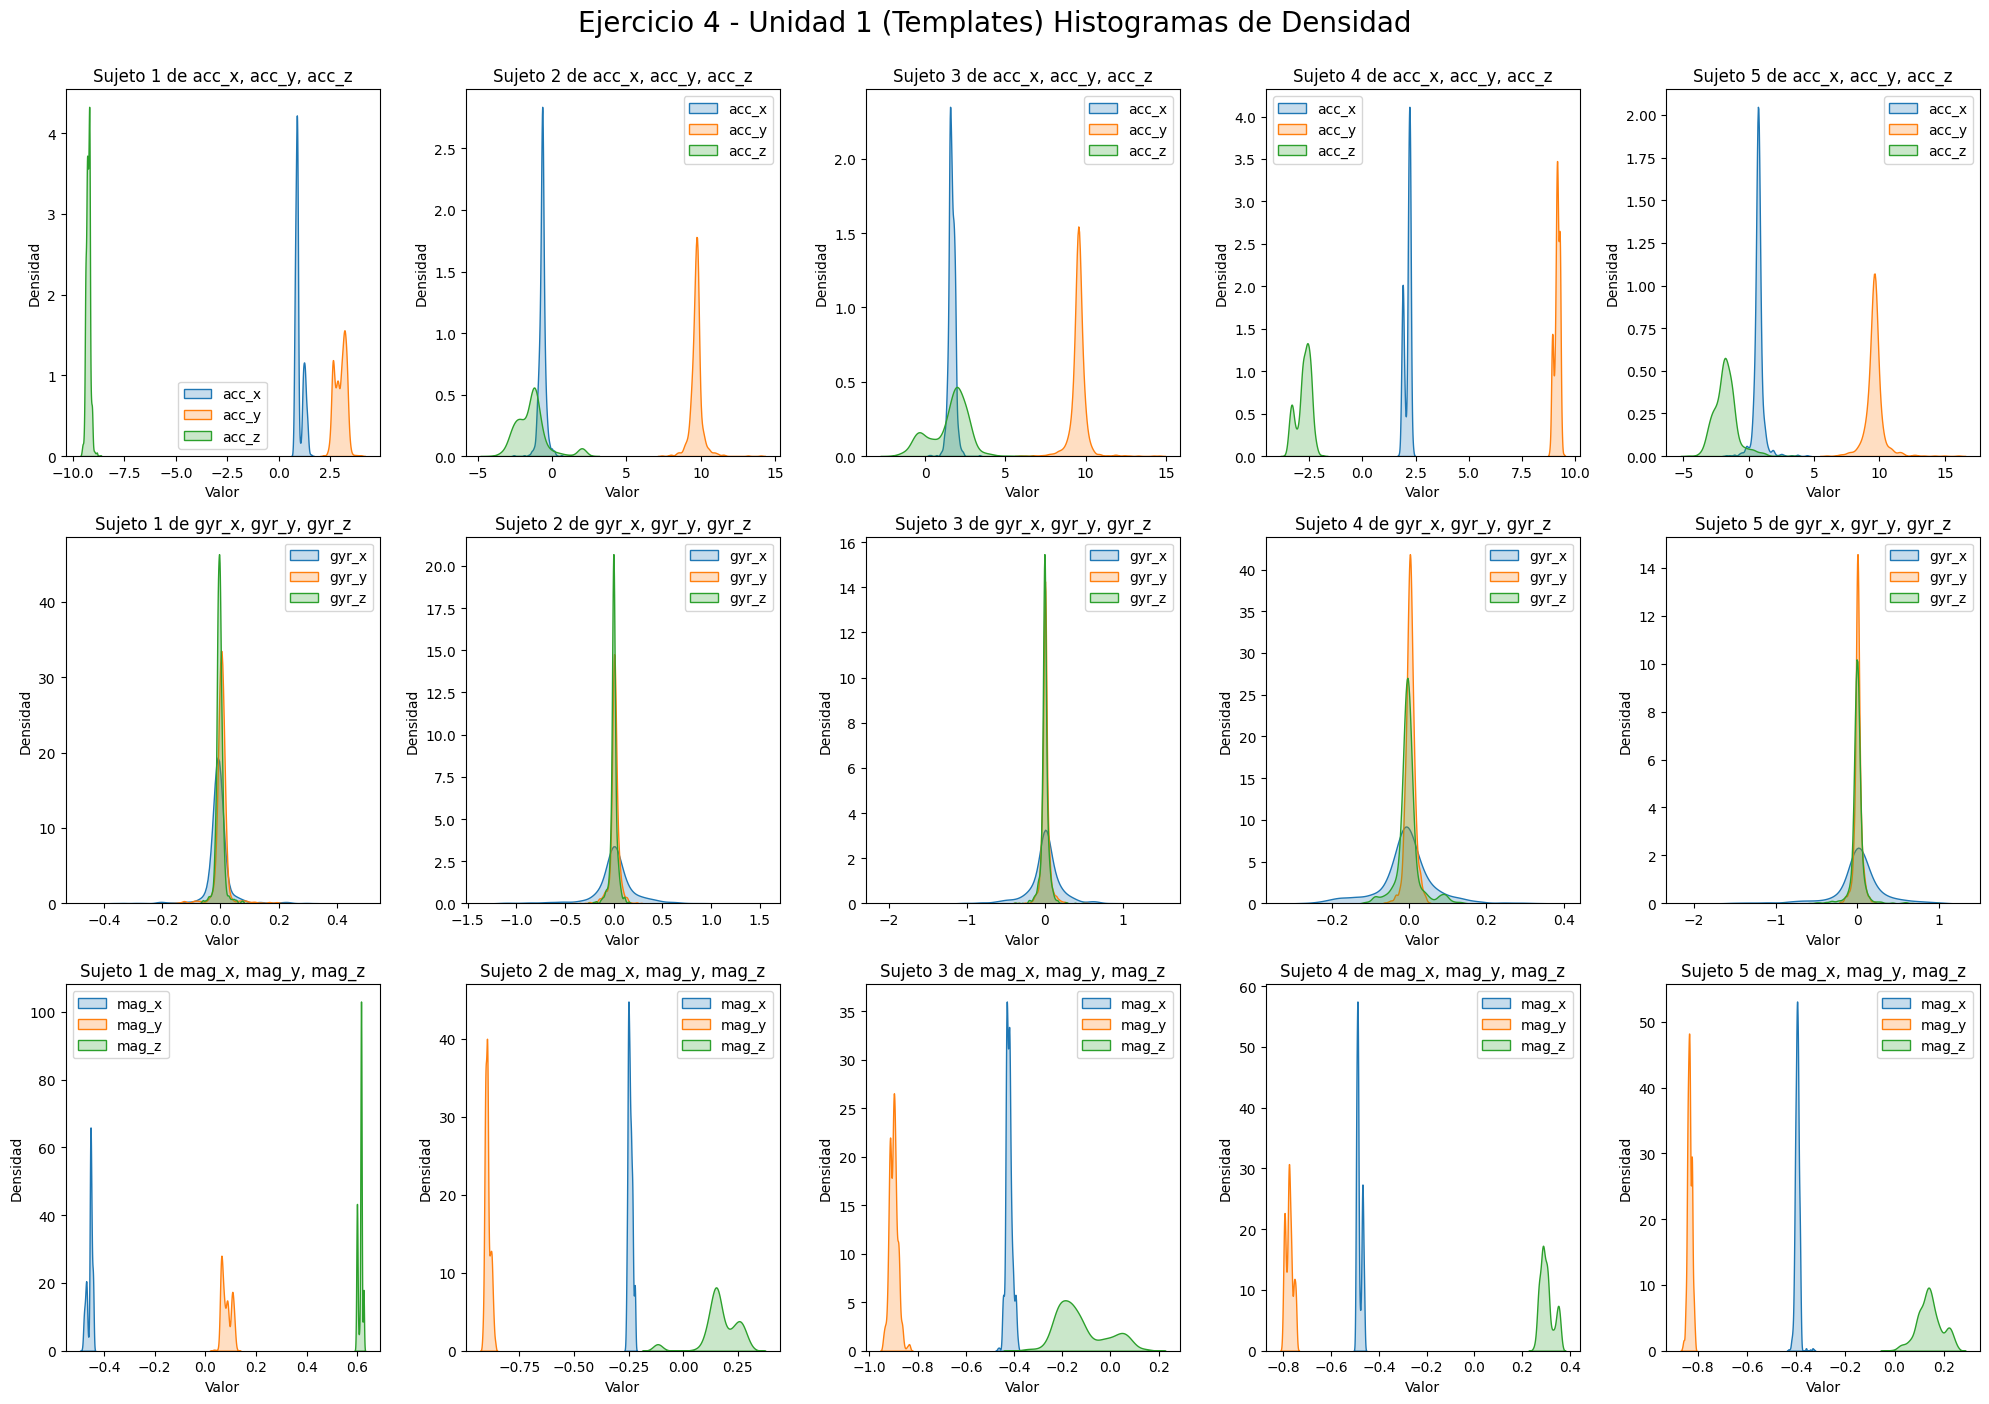

In [ ]:
dfu1 = datos_entrenamiento['es1e5u1']
dfu2 = datos_entrenamiento['es2e5u1']
dfu3 = datos_entrenamiento['es3e5u1']
dfu4 = datos_entrenamiento['es4e5u1']
dfu5 = datos_entrenamiento['es5e5u1']

fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

for i, (df, title) in enumerate(zip(data_frames, titles)):
    
    plot_density(df, axes[0, i], title, 0)  # Fila 1: acc
    plot_density(df, axes[1, i], title, 1)  # Fila 2: gyr
    plot_density(df, axes[2, i], title, 2)  # Fila 3: mag

plt.suptitle('Ejercicio 4 - Unidad 1 (Templates) Histogramas de Densidad', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()

Los histogramas de densidad muestran patrones consistentes en el acelerómetro (acc_x, acc_y, acc_z) entre los sujetos, con distribuciones estrechas y bien definidas en la mayoría de los casos. Sin embargo, el Sujeto 2 presenta una mayor dispersión en acc_y, lo que podría estar relacionado con variaciones en movimientos laterales, y el Sujeto 3 muestra una dispersión más amplia en acc_z, lo que puede reflejar variabilidad en la amplitud de los movimientos verticales. En el giroscopio (gyr_x, gyr_y, gyr_z), las distribuciones son estrechas y bastante uniformes entre los sujetos, indicando que los movimientos rotacionales son consistentes. Por otro lado, las mediciones del magnetómetro reflejan una mayor variabilidad, especialmente en los Sujetos 2 y 3, con picos menos definidos en mag_x y mag_z, lo que sugiere fluctuaciones en la orientación del sensor o inestabilidad postural.

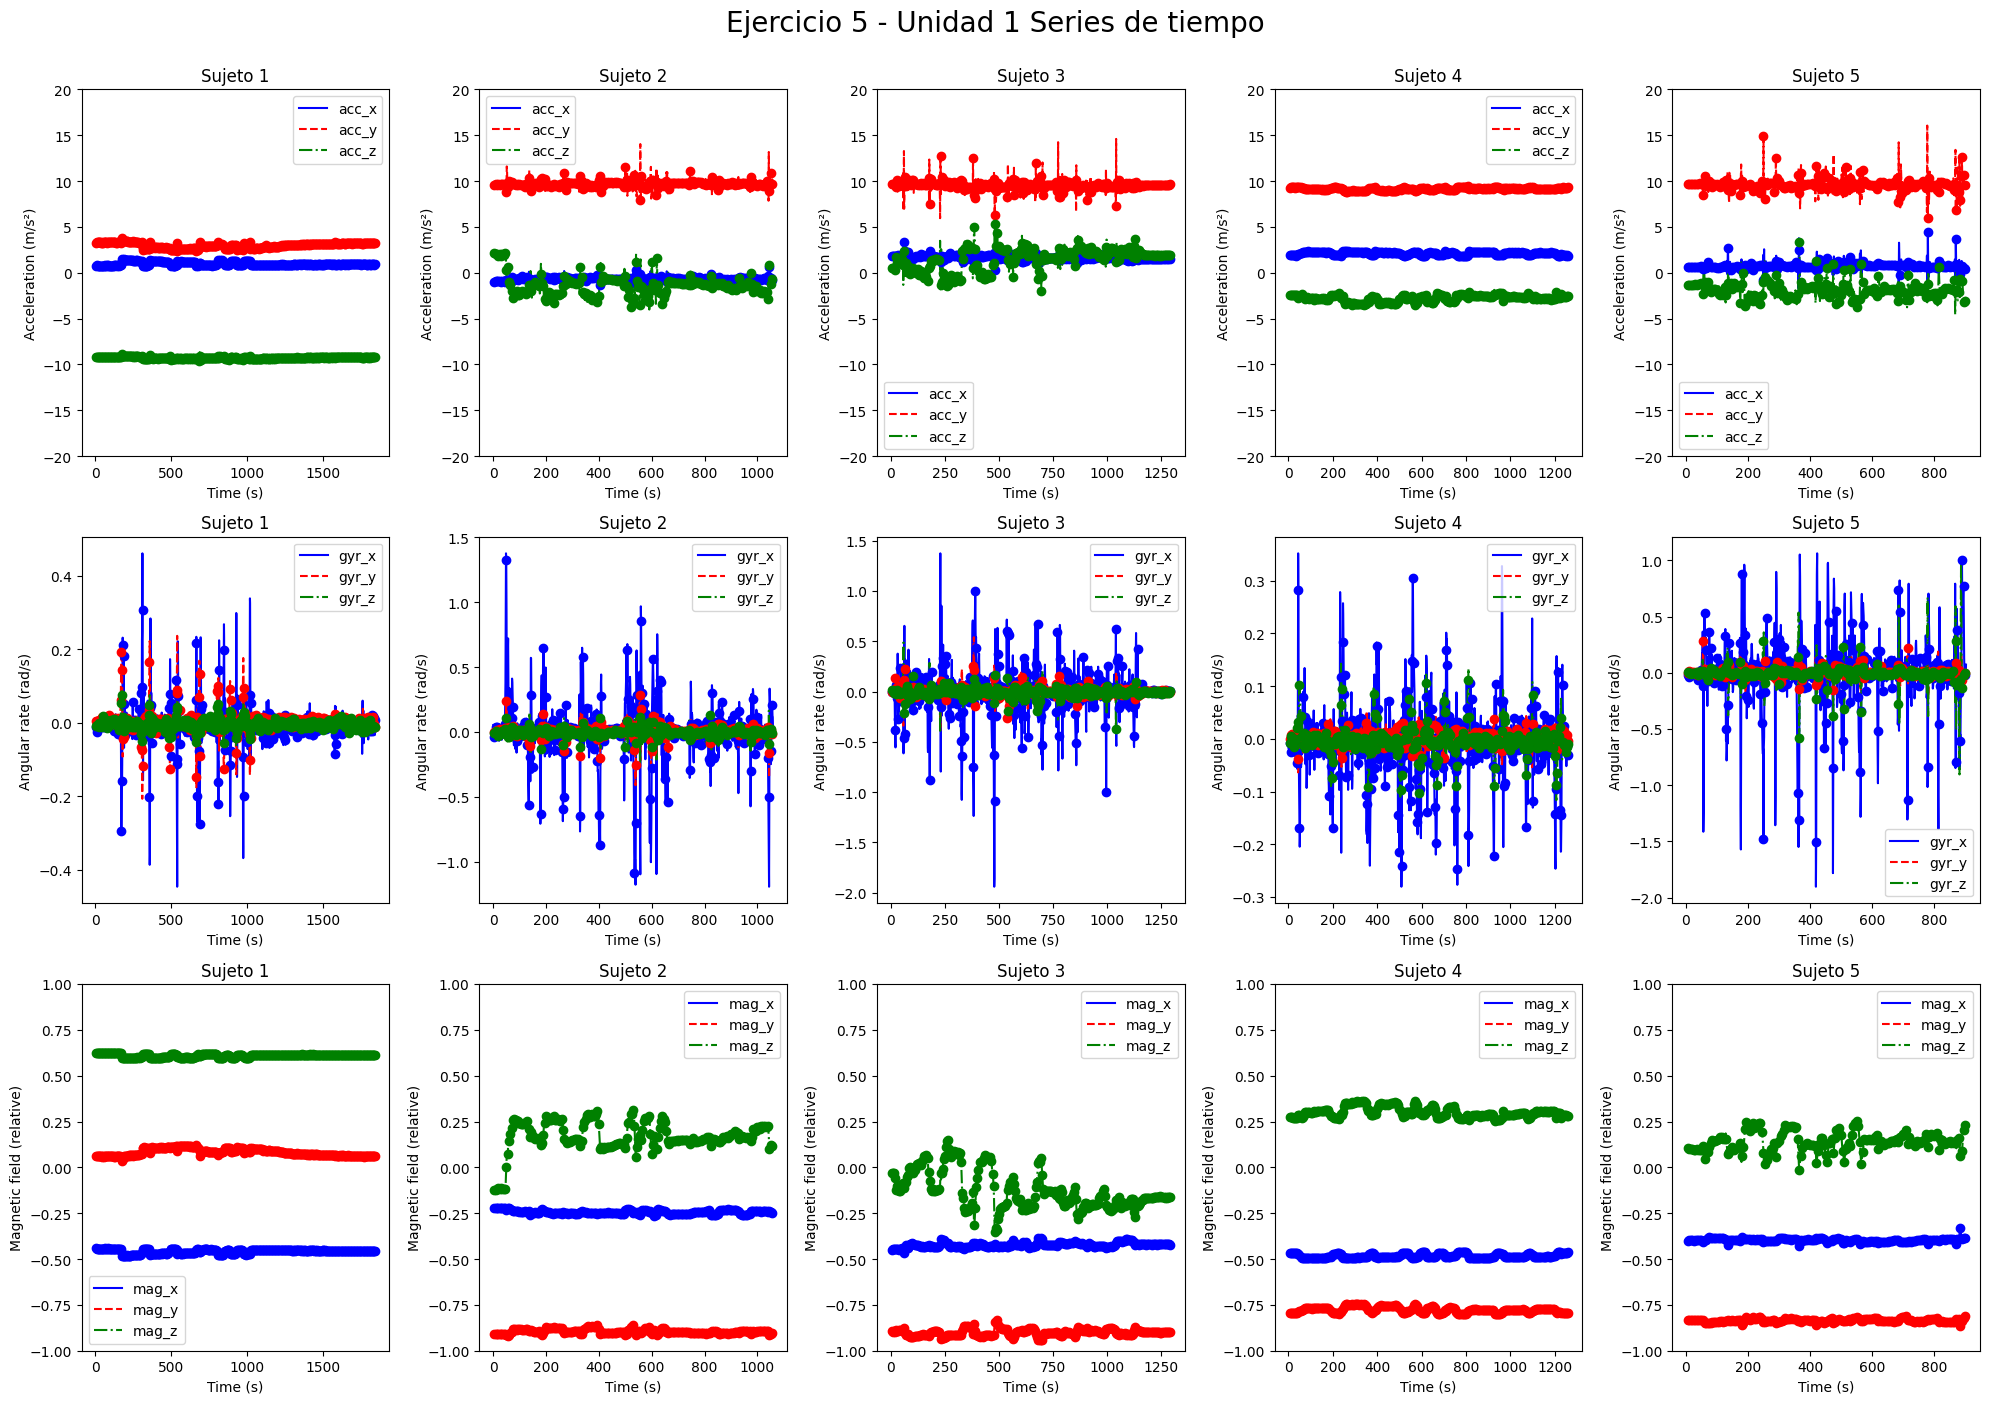

In [29]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

# Iterar sobre las unidades y los subgráficos
for i, (df, title) in enumerate(zip(data_frames, titles)):
    plot_acceleration(df, axes[0, i], title, 0) 
    plot_acceleration(df, axes[1, i], title, 1)  
    plot_acceleration(df, axes[2, i], title, 2)  

plt.suptitle('Ejercicio 5 - Unidad 1 Series de tiempo', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()

El acelerómetro evidencia patrones repetitivos y estables en general, con algunos picos y oscilaciones en los ejes acc_y y acc_z para los Sujetos 2 y 3, respectivamente, lo que podría reflejar técnica inconsistente o movimientos menos controlados. En el giroscopio, los Sujetos 4 y 5 presentan picos más pronunciados en gyr_x y gyr_z, lo que sugiere rotaciones más amplias o descontroladas durante el ejercicio. En el magnetómetro, los Sujetos 2 y 3 muestran mayores fluctuaciones en mag_y y mag_z, lo que podría estar relacionado con ajustes en la postura o desalineaciones del sensor durante el movimiento.

### Ejercicio 6 - Distribución de los datos y Visualización de series de tiempo

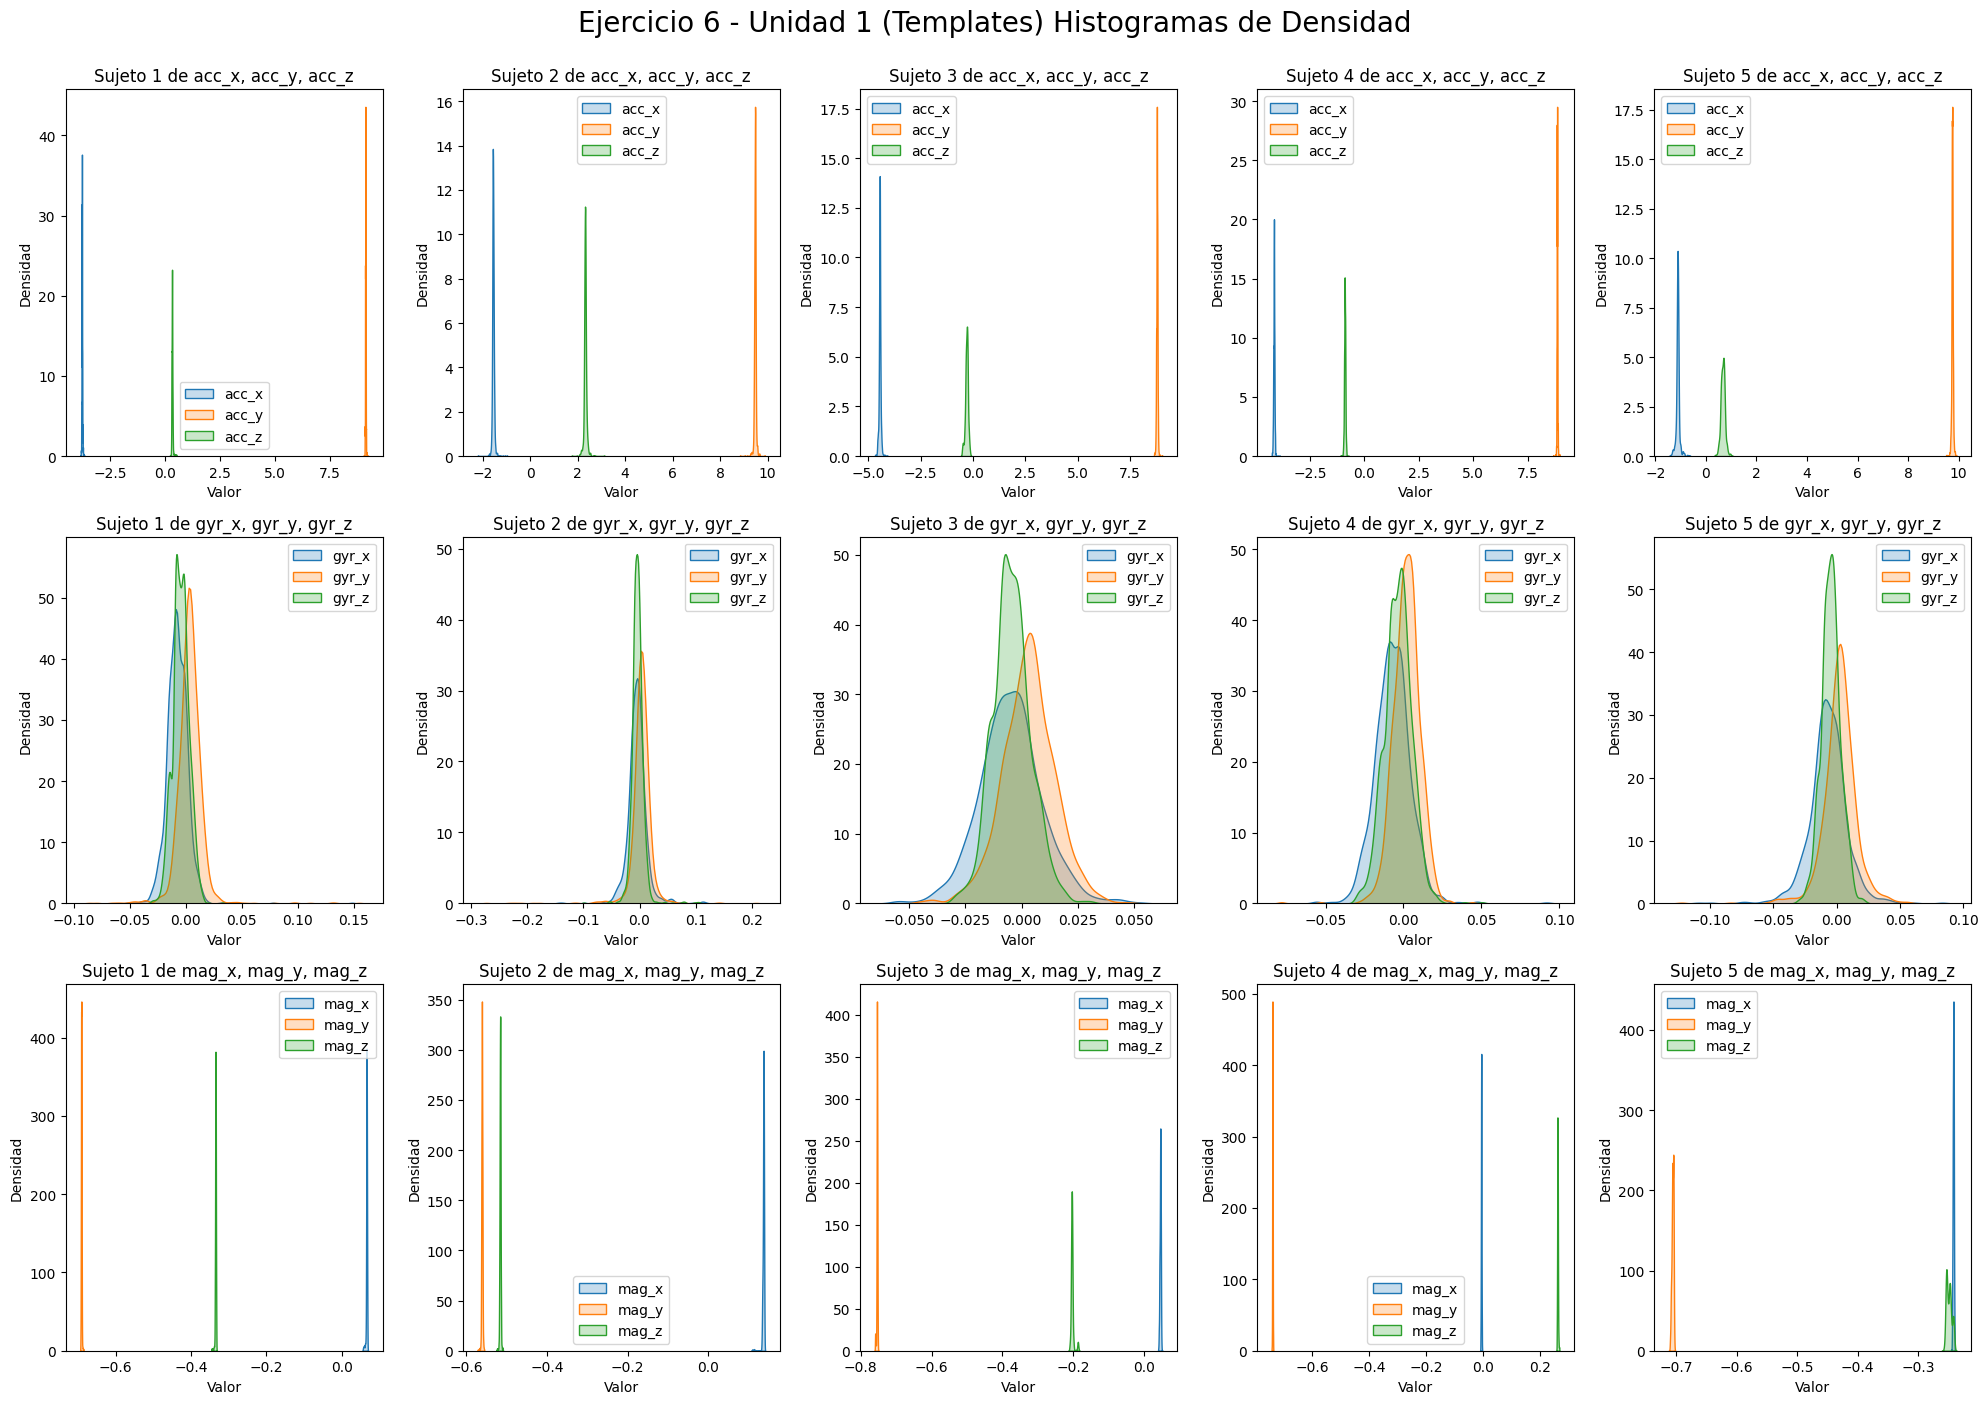

In [30]:
dfu1 = datos_entrenamiento['es1e6u1']
dfu2 = datos_entrenamiento['es2e6u1']
dfu3 = datos_entrenamiento['es3e6u1']
dfu4 = datos_entrenamiento['es4e6u1']
dfu5 = datos_entrenamiento['es5e6u1']


fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

for i, (df, title) in enumerate(zip(data_frames, titles)):
    
    plot_density(df, axes[0, i], title, 0)  # Fila 1: acc
    plot_density(df, axes[1, i], title, 1)  # Fila 2: gyr
    plot_density(df, axes[2, i], title, 2)  # Fila 3: mag

plt.suptitle('Ejercicio 6 - Unidad 1 (Templates) Histogramas de Densidad', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()

En las distribuciones del acelerómetro (acc_x, acc_y, acc_z), los histogramas muestran patrones consistentes y bien definidos entre los sujetos, con picos estrechos y rangos limitados, lo que sugiere movimientos controlados y repetitivos. Sin embargo, el Sujeto 3 presenta una mayor dispersión en acc_y, lo que podría reflejar variabilidad en movimientos laterales. El giroscopio (gyr_x, gyr_y, gyr_z) tiene distribuciones estrechas y similares entre los sujetos, aunque el Sujeto 3 muestra ligeras variaciones en los tres ejes, lo que sugiere movimientos rotacionales algo menos consistentes. En el magnetómetro (mag_x, mag_y, mag_z), los Sujetos 1 y 2 presentan patrones estables, mientras que los Sujetos 3 y 5 muestran una mayor variabilidad en los ejes mag_y y mag_z, lo que podría estar asociado con fluctuaciones posturales o desajustes en el sensor.

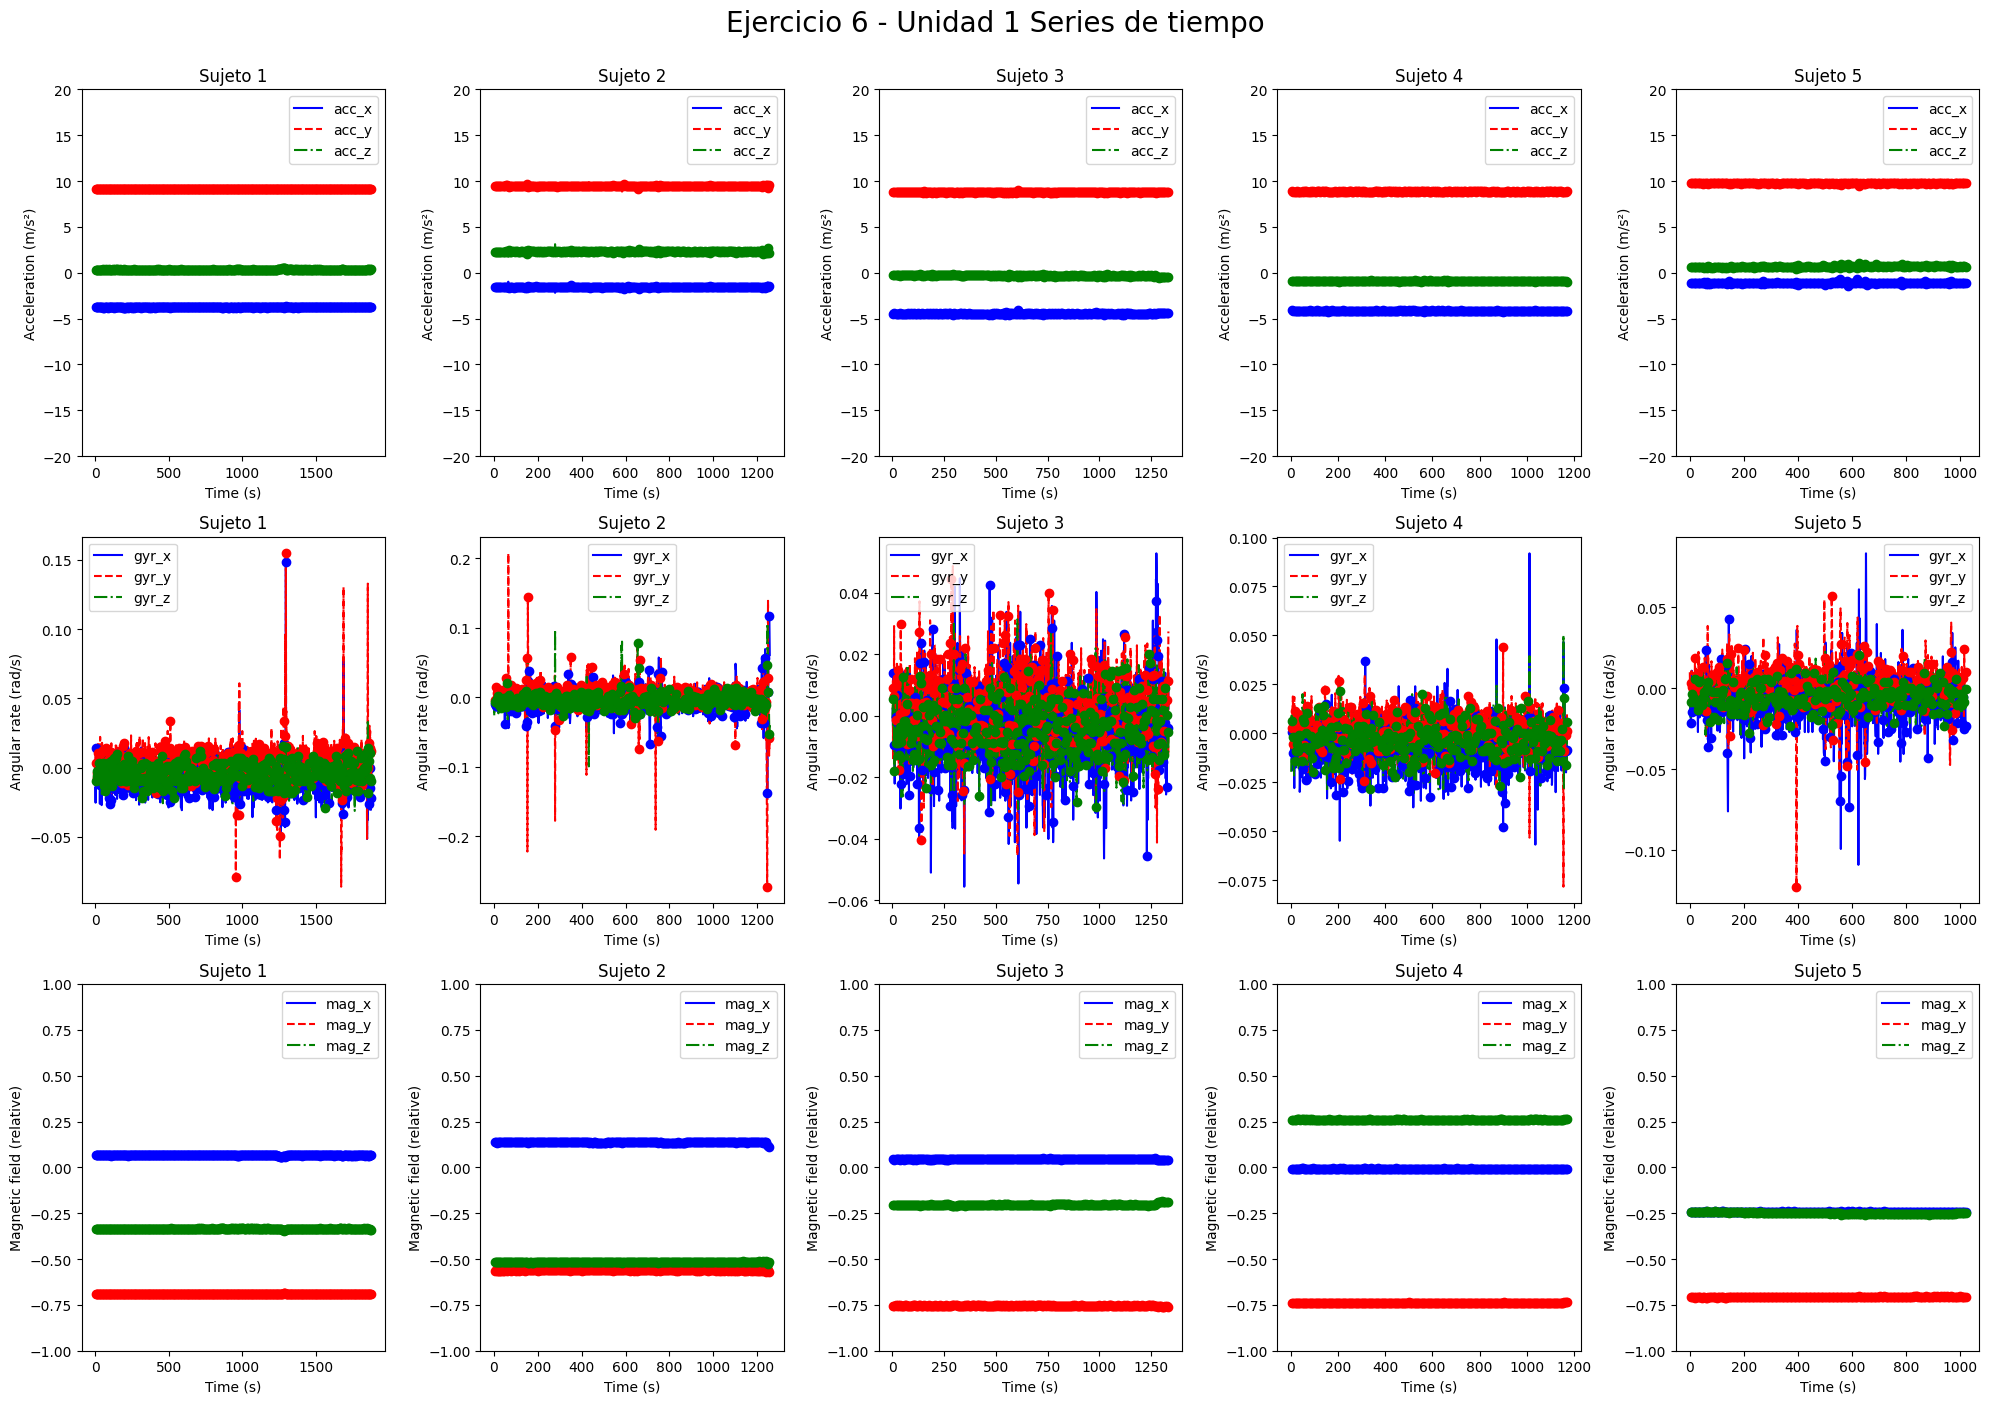

In [32]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

# Iterar sobre las unidades y los subgráficos
for i, (df, title) in enumerate(zip(data_frames, titles)):
    plot_acceleration(df, axes[0, i], title, 0) 
    plot_acceleration(df, axes[1, i], title, 1)  
    plot_acceleration(df, axes[2, i], title, 2)  

plt.suptitle('Ejercicio 6 - Unidad 1 Series de tiempo', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()

En las series de tiempo, las mediciones del acelerómetro muestran movimientos repetitivos y consistentes para la mayoría de los sujetos, con oscilaciones mínimas en los ejes. Sin embargo, el Sujeto 3 tiene mayores fluctuaciones en acc_y, lo que podría reflejar técnica inconsistente en ese eje. El giroscopio muestra mayor sensibilidad a las diferencias individuales, con picos pronunciados y más variabilidad en los ejes gyr_x y gyr_z para los Sujetos 3 y 5, lo que indica movimientos rotacionales más amplios o menos controlados. En el magnetómetro, los Sujetos 3 y 5 presentan cambios significativos en los ejes mag_y y mag_z, lo que podría reflejar cambios posturales o desalineaciones del sensor.

### Ejercicio 7 - Distribución de los datos y Visualización de series de tiempo

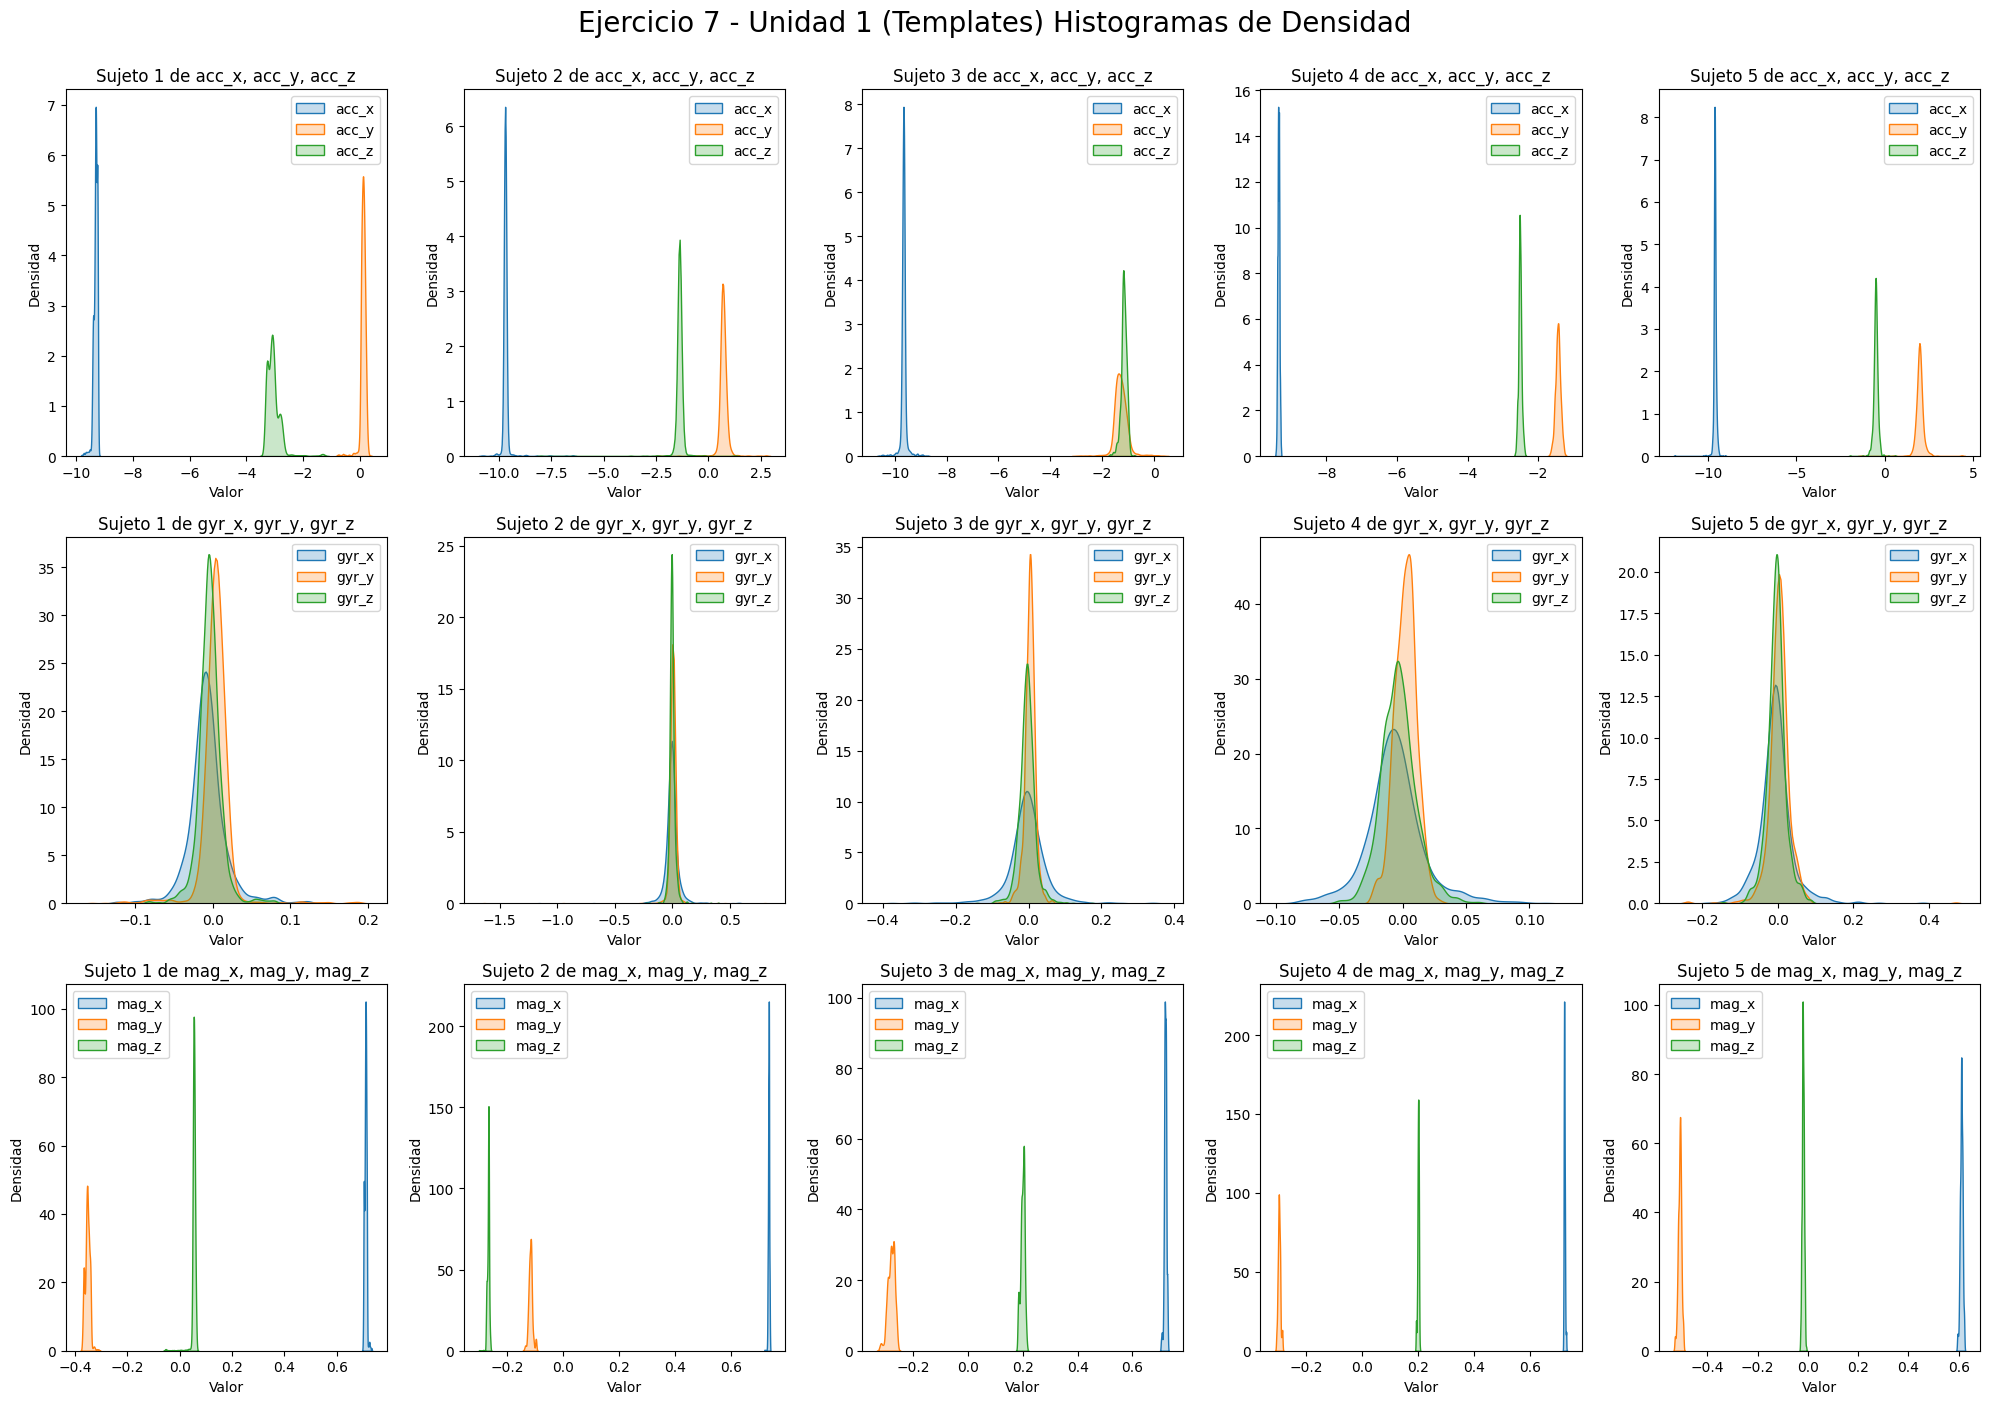

In [33]:
dfu1 = datos_entrenamiento['es1e7u1']
dfu2 = datos_entrenamiento['es2e7u1']
dfu3 = datos_entrenamiento['es3e7u1']
dfu4 = datos_entrenamiento['es4e7u1']
dfu5 = datos_entrenamiento['es5e7u1']


fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

for i, (df, title) in enumerate(zip(data_frames, titles)):
    
    plot_density(df, axes[0, i], title, 0)  # Fila 1: acc
    plot_density(df, axes[1, i], title, 1)  # Fila 2: gyr
    plot_density(df, axes[2, i], title, 2)  # Fila 3: mag

plt.suptitle('Ejercicio 7 - Unidad 1 (Templates) Histogramas de Densidad', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()

Los histogramas del acelerómetro (acc_x, acc_y, acc_z) muestran patrones consistentes entre los sujetos, con distribuciones estrechas que reflejan movimientos controlados y repetitivos. Sin embargo, el Sujeto 2 presenta dispersión más amplia en acc_y, lo que podría reflejar variabilidad en movimientos laterales, y el Sujeto 5 muestra ligeras fluctuaciones en acc_z, indicando posibles diferencias en la amplitud de los movimientos verticales. En el giroscopio (gyr_x, gyr_y, gyr_z), las distribuciones son uniformes y bien concentradas entre los sujetos, aunque el Sujeto 3 presenta leves picos en gyr_x y gyr_z, lo que sugiere movimientos rotacionales menos precisos. Por su parte, las mediciones del magnetómetro (mag_x, mag_y, mag_z) presentan estabilidad en los Sujetos 1 y 4, mientras que los Sujetos 2 y 5 muestran mayor dispersión en mag_y y mag_z, posiblemente asociada con fluctuaciones posturales o desalineación del sensor.

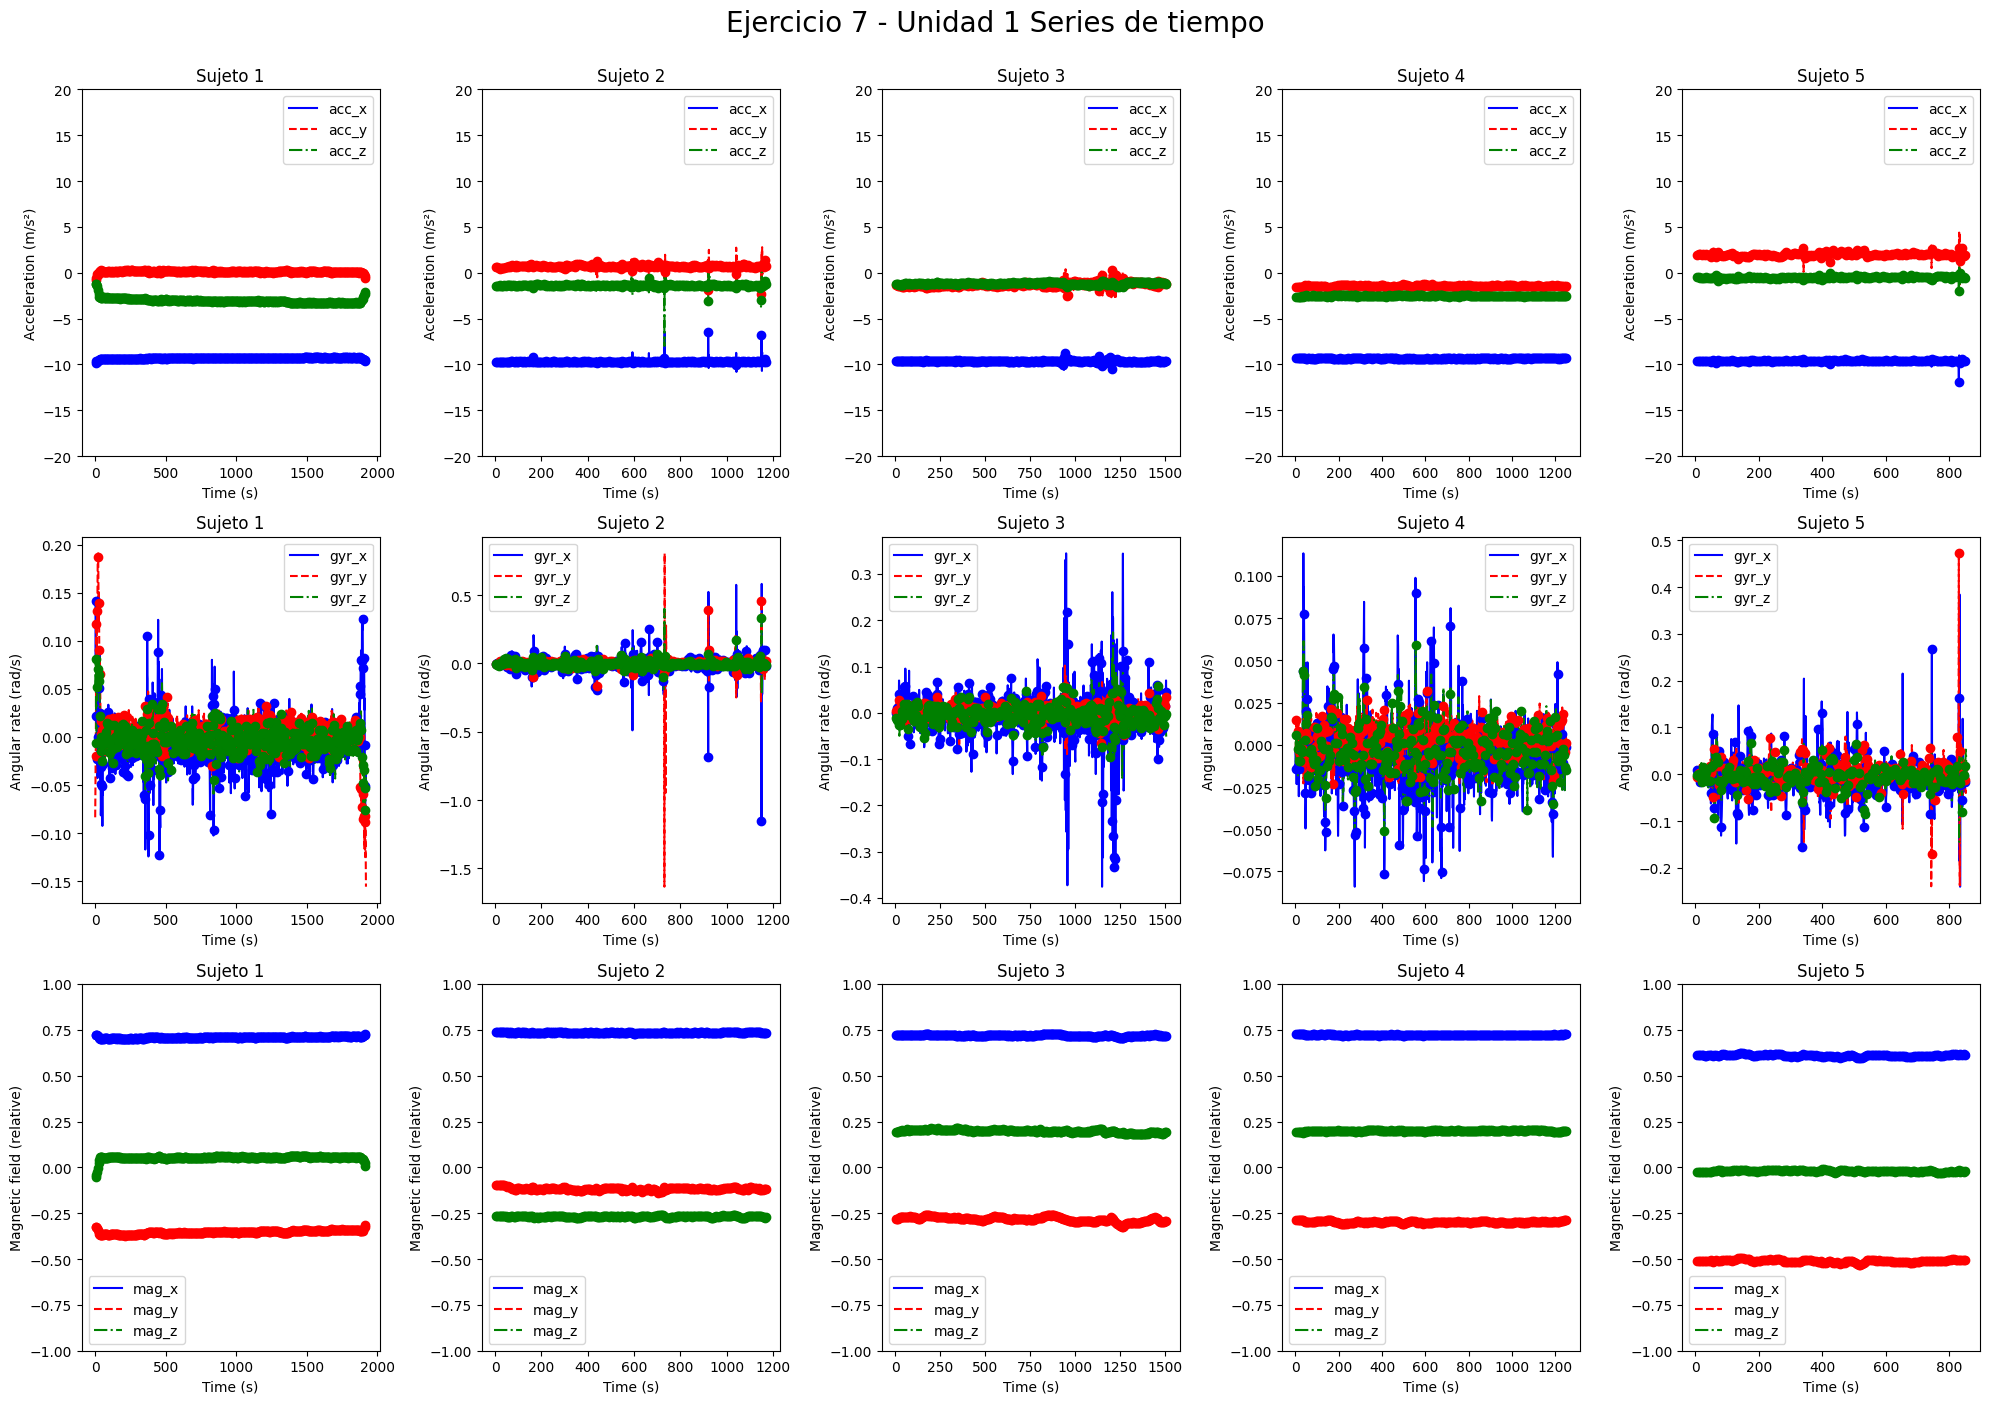

In [34]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

# Iterar sobre las unidades y los subgráficos
for i, (df, title) in enumerate(zip(data_frames, titles)):
    plot_acceleration(df, axes[0, i], title, 0) 
    plot_acceleration(df, axes[1, i], title, 1)  
    plot_acceleration(df, axes[2, i], title, 2)  

plt.suptitle('Ejercicio 7 - Unidad 1 Series de tiempo', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()

El acelerómetro evidencia movimientos repetitivos y consistentes, aunque el Sujeto 2 muestra oscilaciones más amplias en acc_y, reflejando variabilidad lateral en su ejecución. El Sujeto 3 tiene fluctuaciones visibles en acc_z, lo que podría reflejar mayor amplitud en los movimientos verticales. El giroscopio es más sensible a las diferencias individuales, con los Sujetos 3 y 5 mostrando picos más pronunciados en gyr_x y gyr_z, lo que indica movimientos rotacionales más amplios o descontrolados. En el magnetómetro, los Sujetos 2 y 5 presentan mayores fluctuaciones en los ejes mag_y y mag_z, lo que podría estar relacionado con inestabilidad postural o colocación inadecuada del sensor.

### Ejercicio 8 - Distribución de los datos y Visualización de series de tiempo

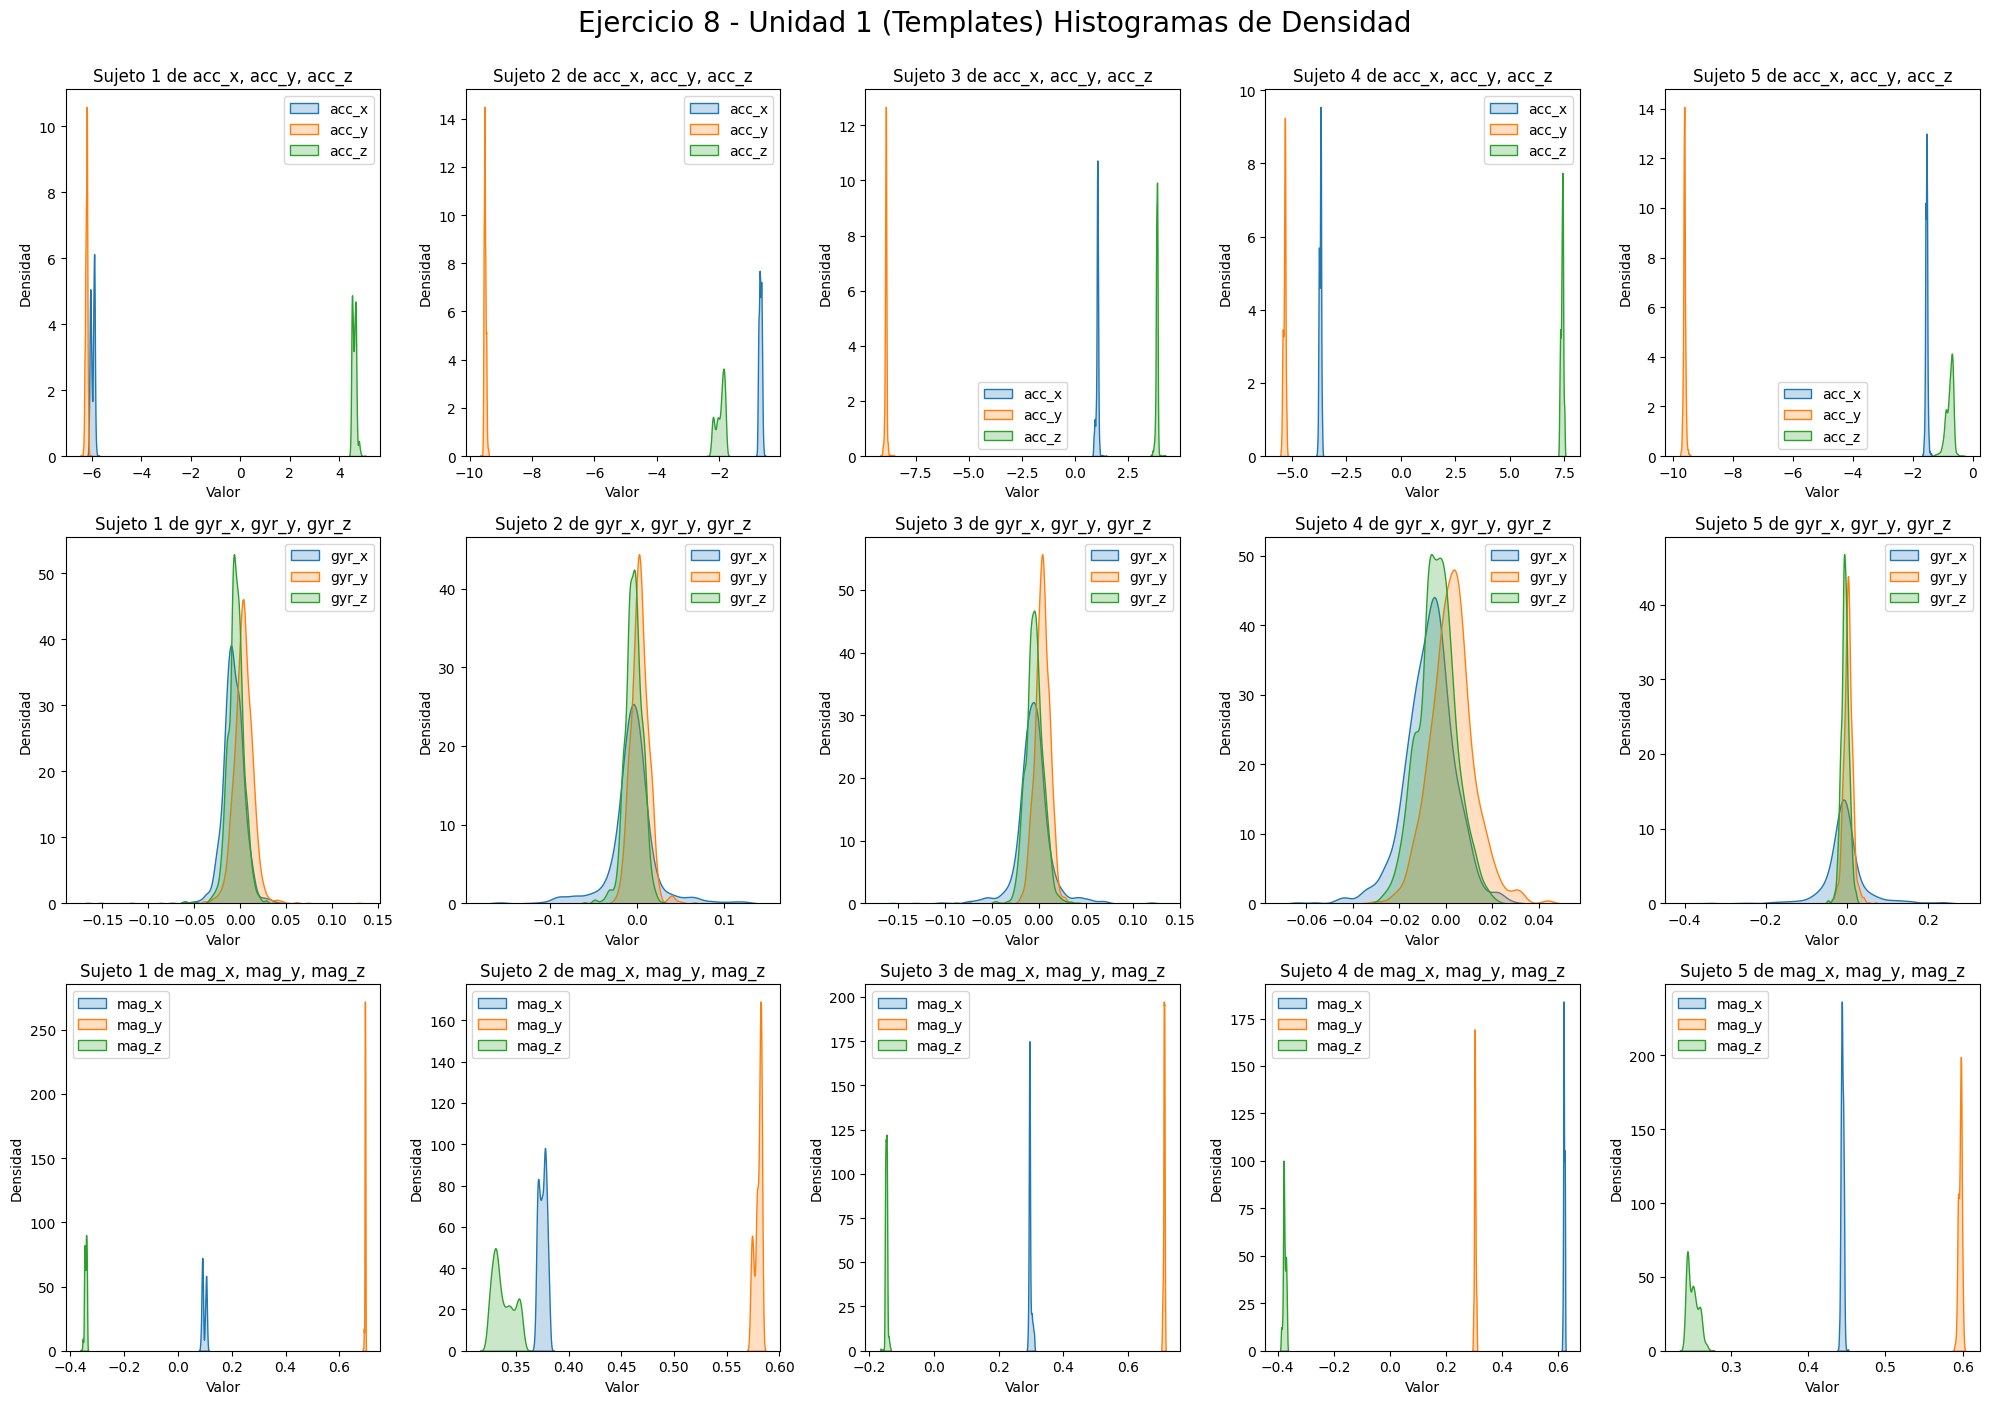

In [35]:
dfu1 = datos_entrenamiento['es1e8u1']
dfu2 = datos_entrenamiento['es2e8u1']
dfu3 = datos_entrenamiento['es3e8u1']
dfu4 = datos_entrenamiento['es4e8u1']
dfu5 = datos_entrenamiento['es5e8u1']


fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

for i, (df, title) in enumerate(zip(data_frames, titles)):
    
    plot_density(df, axes[0, i], title, 0)  # Fila 1: acc
    plot_density(df, axes[1, i], title, 1)  # Fila 2: gyr
    plot_density(df, axes[2, i], title, 2)  # Fila 3: mag

plt.suptitle('Ejercicio 8 - Unidad 1 (Templates) Histogramas de Densidad', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()

Los histogramas del acelerómetro (acc_x, acc_y, acc_z) muestran patrones consistentes entre los sujetos, con picos bien definidos y estrechos, lo que refleja movimientos controlados. Sin embargo, el Sujeto 2 presenta una mayor dispersión en acc_y, lo que podría estar asociado con variabilidad en movimientos laterales, y el Sujeto 4 evidencia dispersión en acc_z, posiblemente relacionada con mayor amplitud en movimientos verticales. En el giroscopio (gyr_x, gyr_y, gyr_z), las distribuciones son uniformes entre los sujetos, pero el Sujeto 3 muestra picos más amplios en gyr_z, lo que podría reflejar movimientos rotacionales menos controlados. El magnetómetro (mag_x, mag_y, mag_z) presenta mayor estabilidad en los Sujetos 1 y 5, mientras que los Sujetos 2 y 4 muestran dispersión más amplia en los ejes mag_y y mag_z, posiblemente asociada con inestabilidad postural o desalineación del sensor

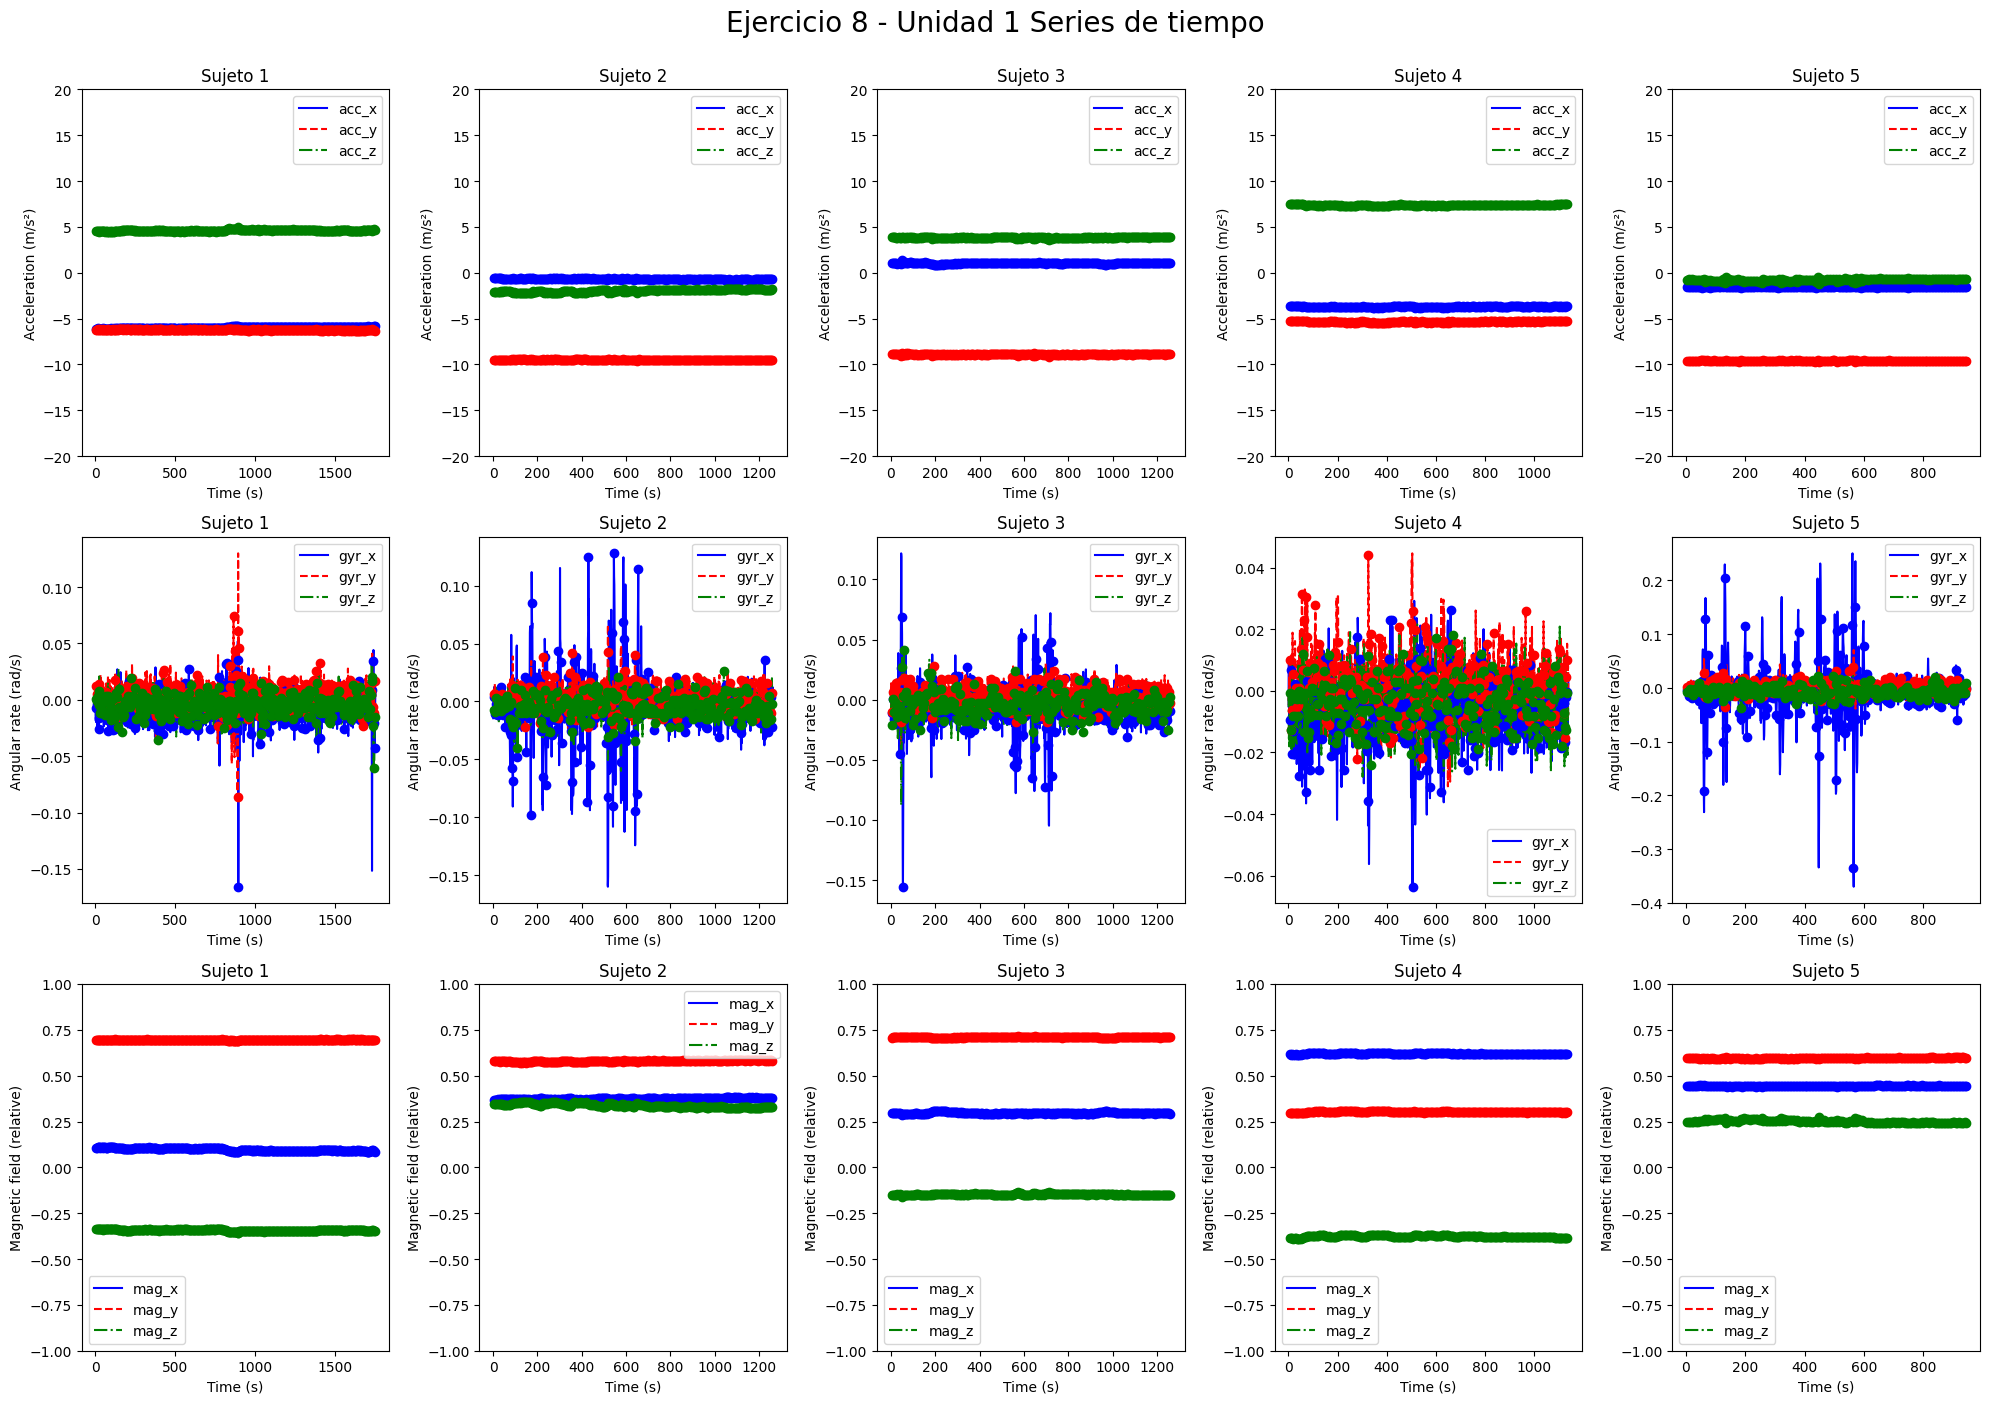

In [36]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))

data_frames = [dfu1, dfu2, dfu3, dfu4, dfu5]
titles = ['Sujeto 1', 'Sujeto 2', 'Sujeto 3', 'Sujeto 4', 'Sujeto 5']

# Iterar sobre las unidades y los subgráficos
for i, (df, title) in enumerate(zip(data_frames, titles)):
    plot_acceleration(df, axes[0, i], title, 0) 
    plot_acceleration(df, axes[1, i], title, 1)  
    plot_acceleration(df, axes[2, i], title, 2)  

plt.suptitle('Ejercicio 8 - Unidad 1 Series de tiempo', fontsize=20, y=1.00, ha='center') 
plt.tight_layout()
plt.show()

En las series de tiempo, el acelerómetro muestra patrones repetitivos y consistentes en general, aunque el Sujeto 2 presenta mayores oscilaciones en acc_y, lo que podría reflejar técnica inconsistente en movimientos laterales. El Sujeto 4 tiene fluctuaciones más notables en acc_z, lo que podría estar relacionado con una mayor variabilidad en movimientos verticales. En el giroscopio, los Sujetos 3 y 5 presentan mayores picos en gyr_x y gyr_z, indicando movimientos rotacionales más amplios o menos controlados. Finalmente, el magnetómetro refleja patrones consistentes en los Sujetos 1 y 5, mientras que los Sujetos 2 y 4 presentan fluctuaciones en mag_y y mag_z, lo que podría estar relacionado con cambios posturales o colocación subóptima del sensor.

### Conclusión general

Tras evaluar los ocho ejercicios en la Unidad 1, considerando las mediciones de acelerómetro, giroscopio y magnetómetro, se observan patrones consistentes en general, pero con diferencias notables en ciertos ejercicios y sujetos. Los ejercicios que destacan positivamente en términos de consistencia y control son el Ejercicio 1 y el Ejercicio 6, donde las distribuciones son más estrechas y los patrones de las series de tiempo son más estables entre los sujetos. Esto sugiere que estos ejercicios son realizados con mayor control y precisión, reflejando movimientos repetitivos y técnica consistente.

Por otro lado, el Ejercicio 3 y el Ejercicio 5 llaman la atención por presentar mayor variabilidad entre los sujetos, especialmente en las mediciones del magnetómetro y el giroscopio, lo que podría indicar movimientos más amplios o menos controlados.


# Análisis de distribución y dispersión

Después de haber entendido las diferencias entre sujetos,  ahora pasar a comparar los sensores por unidades (acelerómetro, giroscopio y magnetómetro) dentro de un ejercicio específico. Con esto observaremos qué sensores capturan mejor la variabilidad o los movimientos más amplios dentro del ejercicio.

Acelerómetro: Captura movimientos lineales (desplazamiento, impacto).
Giroscopio: Detecta rotaciones (ángulos, torsiones).
Magnetómetro: Identifica orientación o cambios posturales.

Enriquece la perspectiva del ejercicio ya no se trata de cómo ejecutan los sujetos, sino de qué sensores capturan mejor las características del movimiento en el ejercicio.

In [48]:
def comparar_sensores(datos_entrenamiento, sujeto, ejercicio, unidad):
    """
    Genera boxplots comparando sensores (acelerómetro, giroscopio, magnetómetro) dentro de un ejercicio.
    """
    data = []
    sensores = ['acc', 'gyr', 'mag']  # Acelerómetro, Giroscopio, Magnetómetro

    for sensor in sensores:
        clave = f'ts{sujeto}e{ejercicio}u{unidad}'  # Clave para acceder al DataFrame
        df = datos_entrenamiento[clave]
        
        for eje in ['x', 'y', 'z']:
            columna = f'{sensor}_{eje}'
            if columna in df:
                data.extend([{'Sensor': sensor.upper(), 'Eje': f'{sensor}_{eje}', 'Valor': val} for val in df[columna]])

    # Crear un DataFrame consolidado para graficar
    df_boxplot = pd.DataFrame(data)

    # Generar el boxplot
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df_boxplot, x='Eje', y='Valor', hue='Sensor', palette='Set2')
    plt.title(f'Comparación de Sensores por Ejes para el Ejercicio {ejercicio} - Sujeto {sujeto}, Unidad {unidad}')
    plt.xlabel('Ejes de los Sensores')
    plt.ylabel('Valor')
    plt.legend(title='Sensor')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()




### Unidad 1

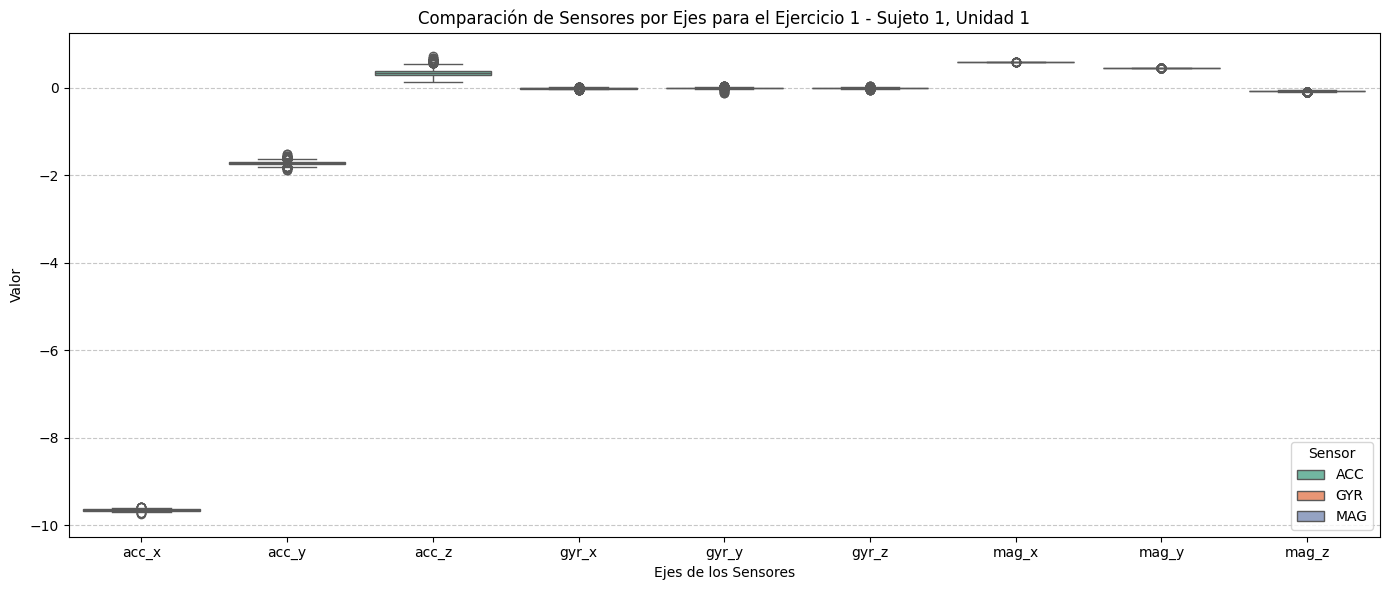

In [47]:
comparar_sensores(datos_entrenamiento, sujeto=1, ejercicio=1, unidad=1)


El acelerómetro (ACC) muestra una mayor variabilidad en el eje y, con un rango claro de valores negativos y positivos. Esto indica que los movimientos lineales captados en este eje son más relevantes para el ejercicio. Los ejes x y z del acelerómetro son más estables, con valores más concentrados. El giroscopio (GYR) tiene valores concentrados alrededor de cero en todos los ejes, mostrando que las rotaciones no son significativas en esta unidad. Por último, el magnetómetro (MAG) presenta valores muy consistentes y rangos reducidos en los tres ejes, indicando estabilidad en los datos relacionados con la orientación.

### Unidad 2 

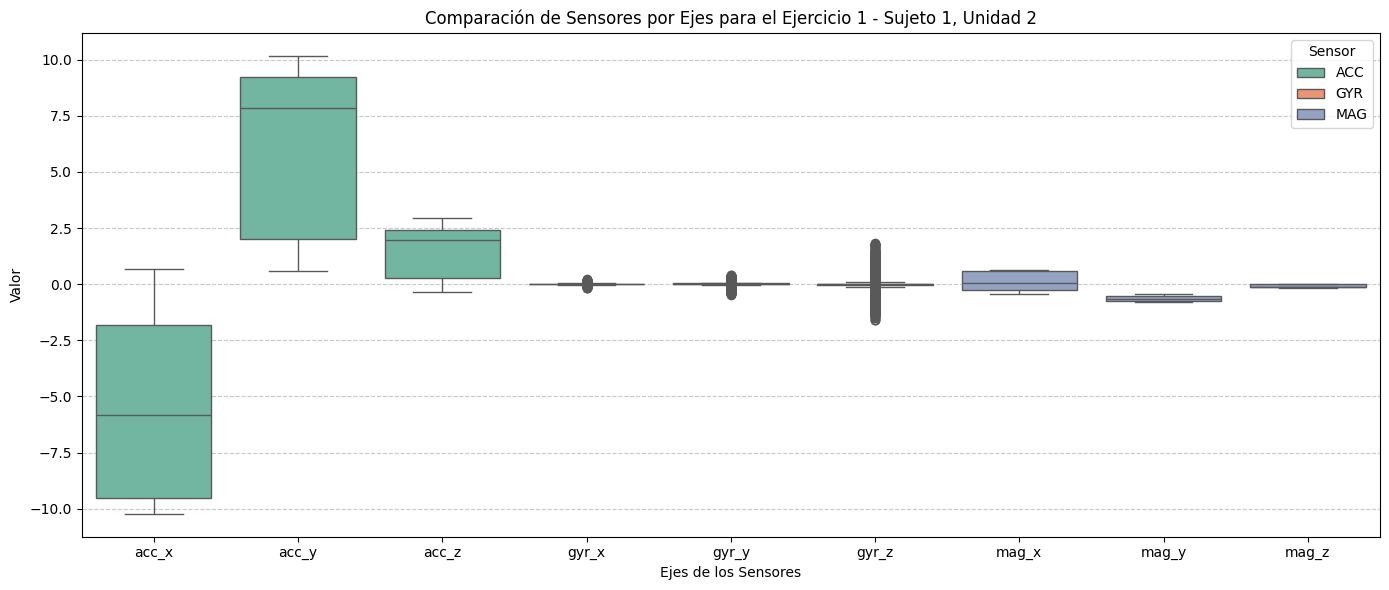

In [39]:
comparar_sensores(datos_entrenamiento, sujeto=1, ejercicio=1, unidad=2)

El eje y del acelerómetro muestra una dispersión mucho mayor en comparación con otras unidades, con valores positivos más altos, lo que sugiere movimientos lineales más amplios en esta unidad. Los ejes x y z del acelerómetro tienen valores más controlados, indicando menor participación en los movimientos. El giroscopio, al igual que en la Unidad 1, muestra distribuciones estrechas centradas cerca de cero, lo que sugiere que las rotaciones no son dominantes. El magnetómetro sigue mostrando valores muy consistentes, con rangos pequeños en todos los ejes, lo que refuerza su estabilidad.

### Unidad 3

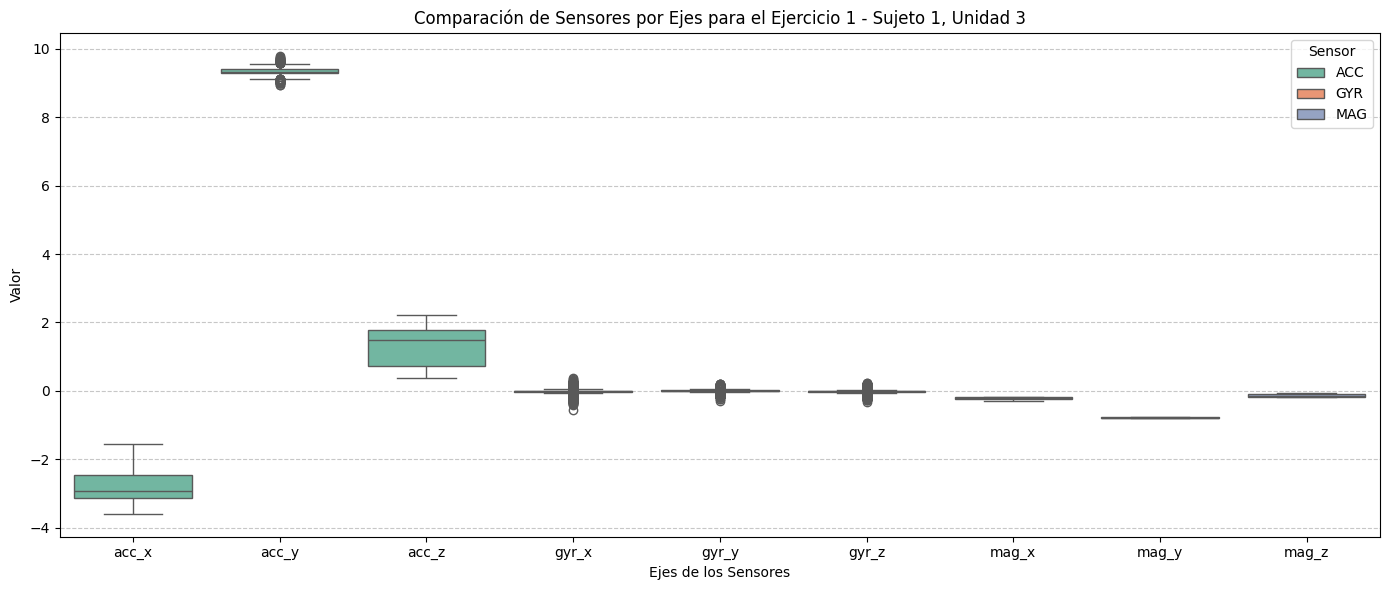

In [43]:
comparar_sensores(datos_entrenamiento, sujeto=1, ejercicio=1, unidad=3)

Aquí, el acelerómetro nuevamente destaca en el eje y por mostrar variabilidad considerable, aunque menor que en la Unidad 2. Los ejes x y z permanecen más estables. El giroscopio continúa mostrando valores centrados alrededor de cero, confirmando que no hay rotaciones significativas en esta unidad. El magnetómetro, al igual que en las imágenes anteriores, mantiene valores constantes y rangos reducidos, indicando poca o ninguna variación en la orientación o el campo magnético durante el ejercicio.

### Unidad 4

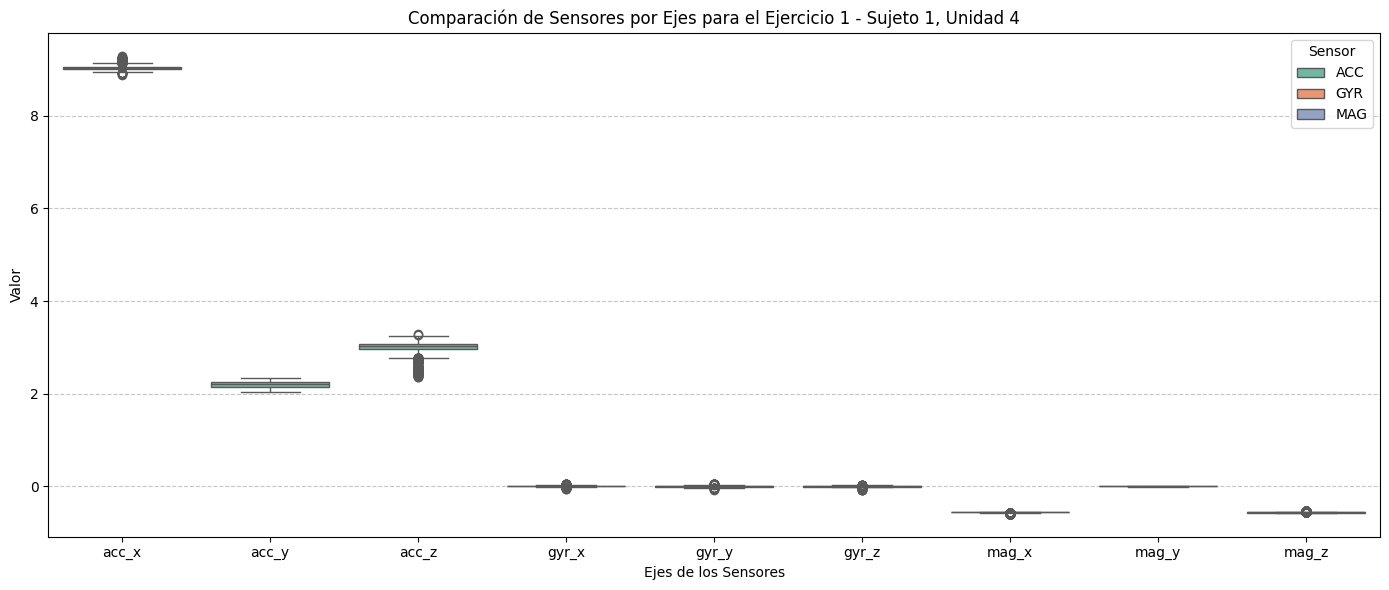

In [41]:
comparar_sensores(datos_entrenamiento, sujeto=1, ejercicio=1, unidad=4)

En esta unidad, el acelerómetro muestra nuevamente al eje y como el más variable, aunque con una dispersión algo menor en comparación con la Unidad 2. Los ejes x y z mantienen valores estables. El giroscopio sigue mostrando distribuciones estrechas en todos los ejes, lo que confirma la falta de rotaciones significativas. El magnetómetro presenta una tendencia similar a las otras unidades, con rangos estrechos y valores consistentes en los tres ejes.

### Unidad 5

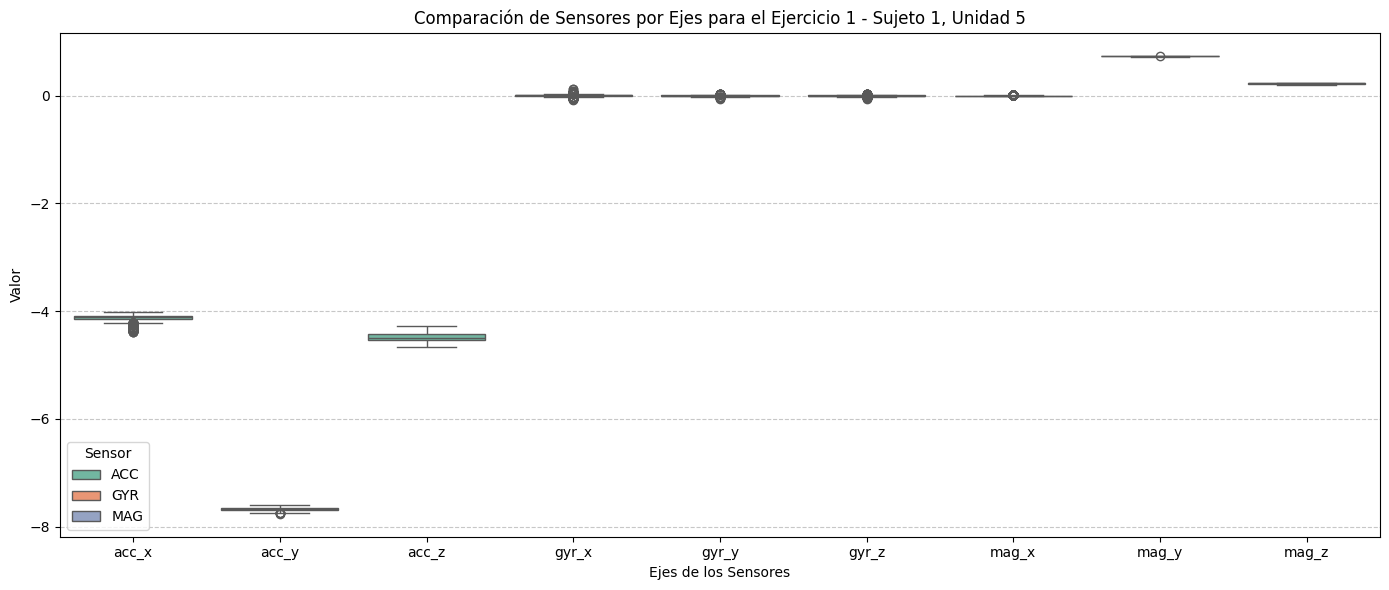

In [42]:
comparar_sensores(datos_entrenamiento, sujeto=1, ejercicio=1, unidad=5)

En esta última unidad, el acelerómetro presenta un patrón más similar al de la Unidad 3, con algo de variabilidad en el eje y, pero sin destacar tanto como en la Unidad 2. Los ejes x y z son nuevamente más estables. El giroscopio mantiene su patrón consistente de distribuciones concentradas cerca de cero, mientras que el magnetómetro sigue mostrando rangos pequeños y valores constantes en todos los ejes

La Unidad 2 llama más la atención debido a la mayor dispersión en los valores del acelerómetro, especialmente en el eje y. Esto indica una mayor variabilidad en los movimientos lineales capturados por este sensor en comparación con las demás unidades. Los patrones más amplios observados en el acelerómetro de esta unidad contrastan con la estabilidad relativa de los otros sensores (giroscopio y magnetómetro), lo que refuerza su relevancia en este contexto. 